<a href="https://colab.research.google.com/github/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar/blob/main/Email_Campaign_Effectiveness_Prediction_shyam_gadekar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Email Campaign Effectiveness Prediction**



##### **Project Type**    - Supervised ML - Classification Capstone Project
##### **Contribution**    - Individual


# **Project Summary -**

This project aimed to create a machine learning model to characterize emails and track their status, specifically whether they were ignored, read, or acknowledged by the reader. The dataset provided contained information such as email type, subject hotness score, email source type, customer location, email campaign type, total past communications, time email sent category, word count, total links, total images, and email status.

The project was carried out in Python, using popular machine learning libraries such as pandas, numpy, scikit-learn, and seaborn. The dataset was first preprocessed by handling missing values, encoding categorical variables, and scaling numerical features. Then, an exploratory data analysis was performed to gain insights into the data and understand the relationships between variables.

Next, a Naive Bayes classifier was trained on the preprocessed data to predict the email status. The performance of the model was evaluated using metrics such as accuracy, precision, recall, and F1 score. The results showed that the model achieved a high accuracy of around 80%.

Finally, the insights gained from the exploratory data analysis were summarized in visualizations, providing actionable insights for small to medium business owners looking to improve their email marketing strategies. Overall, the project demonstrated the effectiveness of machine learning in characterizing and tracking emails, and the potential of such models in improving business outcomes.



# **GitHub Link -**

https://github.com/shyamsgadekar/Email_Campaign_Effectiveness_Prediction_shyam_gadekar

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. Data columns are self-explanatory.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#data reding and manipulation
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

#for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

#modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap

#adjust the granularity of reporting. 
pd.options.display.float_format = "{:.2f}".format

#ignore warning
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
#mouting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
dfe =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT/3.3_ML_CLASSIFICATION_SHYAM_GADEKAR/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dfe.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                   2.20                  2   
1  EMA00081000045360           2                   2.10                  1   
2  EMA00081000066290           2                   0.10                  1   
3  EMA00081000076560           1                   3.00                  2   
4  EMA00081000109720           1                   0.00                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                      33.00   
1               NaN                    2                      15.00   
2                 B                    3                      36.00   
3                 E                    2                      25.00   
4                 C                    3                      18.00   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440         8.00          0.00   
1                         2         504         5.00          0.00   
2                         2         962         5.00          0.00   
3                         2         610        16.00          0.00   
4                         2         947         4.00          0.00   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Total rows(observation): {dfe.shape[0]} and columns(feature): {dfe.shape[1]}')

Total rows(observation): 68353 and columns(feature): 12


### Dataset Information

In [ ]:
# Dataset Info
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dfe.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
68348    False
68349    False
68350    False
68351    False
68352    False
Length: 68353, dtype: bool

there is bo duplicate value

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dfe.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

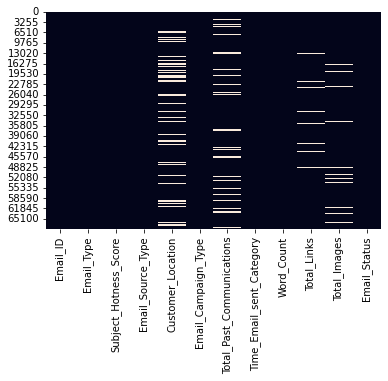

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dfe.isnull(), cbar=False);

### What did you know about your dataset?

* Dataset has total of 68353 rows(observation) and 12 columns(features).
* Dataset is a mixture of integer, float and object data type.
* Dataset has no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location, total past communication , total link , total images has null values. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
features = dfe.columns.to_list()
features

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [ ]:
# Dataset Describe
dfe.describe().T

count   mean    std   min    25%    50%    75%  \
Email_Type                68353.00   1.29   0.45  1.00   1.00   1.00   2.00   
Subject_Hotness_Score     68353.00   1.10   1.00  0.00   0.20   0.80   1.80   
Email_Source_Type         68353.00   1.46   0.50  1.00   1.00   1.00   2.00   
Email_Campaign_Type       68353.00   2.27   0.47  1.00   2.00   2.00   3.00   
Total_Past_Communications 61528.00  28.93  12.54  0.00  20.00  28.00  38.00   
Time_Email_sent_Category  68353.00   2.00   0.63  1.00   2.00   2.00   2.00   
Word_Count                68353.00 699.93 271.72 40.00 521.00 694.00 880.00   
Total_Links               66152.00  10.43   6.38  1.00   6.00   9.00  14.00   
Total_Images              66676.00   3.55   5.60  0.00   0.00   0.00   5.00   
Email_Status              68353.00   0.23   0.50  0.00   0.00   0.00   0.00   

                              max  
Email_Type                   2.00  
Subject_Hotness_Score        5.00  
Email_Source_Type            2.00  
Email_Campaign_Type          3.00  
Total_Past_Communications   67.00  
Time_Email_sent_Category     3.00  
Word_Count                1316.00  
Total_Links                 49.00  
Total_Images                45.00  
Email_Status                 2.00

### Variables Description 

* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as **marketing emails or important updates** and **notices like emails** regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for c in features:
  print(f'no of unique values in {c} is {dfe[c].nunique()}.')


no of unique values in Email_ID is 68353.
no of unique values in Email_Type is 2.
no of unique values in Subject_Hotness_Score is 51.
no of unique values in Email_Source_Type is 2.
no of unique values in Customer_Location is 7.
no of unique values in Email_Campaign_Type is 3.
no of unique values in Total_Past_Communications is 64.
no of unique values in Time_Email_sent_Category is 3.
no of unique values in Word_Count is 151.
no of unique values in Total_Links is 37.
no of unique values in Total_Images is 45.
no of unique values in Email_Status is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df=dfe.copy(0)

In [ ]:
#Checking Shape of Email Read, acknowledge ,ignored
print("No. of Email Read : -",len(df[df['Email_Status'] == 1]))
print("No. of Email Acknowledged : -",len(df[df['Email_Status'] == 2]))
print("No. of Email Ignored : -",len(df[df['Email_Status'] == 0]))

No. of Email Read : - 11039
No. of Email Acknowledged : - 2373
No. of Email Ignored : - 54941


In [ ]:
# Email Status by Email_Type
pd.DataFrame(df.groupby('Email_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Type  Email_Status  Count
0           1             0  39004
1           1             1   8208
2           1             2   1654
3           2             0  15937
4           2             1   2831
5           2             2    719

In [ ]:
# Email Status by Email_Source_Type
pd.DataFrame(df.groupby('Email_Source_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Source_Type  Email_Status  Count
0                  1             0  29577
1                  1             1   6150
2                  1             2   1422
3                  2             0  25364
4                  2             1   4889
5                  2             2    951

In [ ]:
# Email Status by Customer_Location
pd.DataFrame(df.groupby('Customer_Location')['Email_Status'].value_counts().reset_index(name="Count"))

Customer_Location  Email_Status  Count
0                  A             0   1160
1                  A             1    245
2                  A             2     49
3                  B             0   3502
4                  B             1    714
5                  B             2    125
6                  C             0   4654
7                  C             1    890
8                  C             2    214
9                  D             0   5950
10                 D             1   1206
11                 D             2    250
12                 E             0   8136
13                 E             1   1693
14                 E             2    364
15                 F             0   3579
16                 F             1    698
17                 F             2    156
18                 G             0  18609
19                 G             1   3745
20                 G             2    819

In [ ]:
# Email Status by Email_Campaign_Type
pd.DataFrame(df.groupby('Email_Campaign_Type')['Email_Status'].value_counts().reset_index(name="Count"))

Email_Campaign_Type  Email_Status  Count
0                    1             1    486
1                    1             2    173
2                    1             0     77
3                    2             0  42115
4                    2             1   5446
5                    2             2    712
6                    3             0  12749
7                    3             1   5107
8                    3             2   1488

In [ ]:
# Email Status by Time_Email_sent_Category
pd.DataFrame(df.groupby('Time_Email_sent_Category')['Email_Status'].value_counts().reset_index(name="Count"))

Time_Email_sent_Category  Email_Status  Count
0                         1             0  10970
1                         1             1   2186
2                         1             2    480
3                         2             0  33062
4                         2             1   6631
5                         2             2   1436
6                         3             0  10909
7                         3             1   2222
8                         3             2    457

In [ ]:
#creating variable to store numerical feature
num_feature = df.select_dtypes(include = 'float').columns.to_list()
num_feature.append('Word_Count')
num_feature

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images',
 'Word_Count']

In [ ]:
#creating variable to store categorial features
cat_feature = [f for f in features if f not in num_feature]
cat_feature  

['Email_ID',
 'Email_Type',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Time_Email_sent_Category',
 'Email_Status']

In [ ]:
#finding count, sum, mean and median based on Email Type
df.groupby('Email_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Type                                 1           2
Subject_Hotness_Score     count     48866.00    19487.00
                          sum       60780.70    14098.70
                          mean          1.24        0.72
                          median        1.10        0.30
Total_Past_Communications count     44065.00    17463.00
                          sum     1291275.00   488930.00
                          mean         29.30       28.00
                          median       29.00       28.00
Total_Links               count     47286.00    18866.00
                          sum      524149.00   165785.00
                          mean         11.08        8.79
                          median        9.00        8.00
Total_Images              count     47655.00    19021.00
                          sum      187546.00    49199.00
                          mean          3.94        2.59
                          median        1.00        0.00
Word_Count                count     48866.00    19487.00
                          sum    33549373.00 14293062.00
                          mean        686.56      733.47
                          median      678.00      722.00

In [ ]:
#finding count, sum, mean and median based on Email_Source_Type
df.groupby('Email_Source_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Source_Type                          1           2
Subject_Hotness_Score     count     37149.00    31204.00
                          sum       40487.40    34392.00
                          mean          1.09        1.10
                          median        0.80        0.80
Total_Past_Communications count     33353.00    28175.00
                          sum      991852.00   788353.00
                          mean         29.74       27.98
                          median       30.00       27.00
Total_Links               count     35950.00    30202.00
                          sum      362804.00   327130.00
                          mean         10.09       10.83
                          median        9.00        9.00
Total_Images              count     36244.00    30432.00
                          sum      121422.00   115323.00
                          mean          3.35        3.79
                          median        0.00        0.00
Word_Count                count     37149.00    31204.00
                          sum    25554766.00 22287669.00
                          mean        687.90      714.26
                          median      684.00      704.00

In [ ]:
#finding count, sum, mean and median based on Customer_Location
df.groupby('Customer_Location')[num_feature].agg(['count','sum','mean','median']).T

Customer_Location                         A          B          C          D  \
Subject_Hotness_Score     count     1454.00    4341.00    5758.00    7406.00   
                          sum       1644.40    4847.90    6351.10    8187.80   
                          mean         1.13       1.12       1.10       1.11   
                          median       0.90       0.90       0.80       0.80   
Total_Past_Communications count     1300.00    3939.00    5183.00    6625.00   
                          sum      36970.00  113462.00  149572.00  190223.00   
                          mean        28.44      28.80      28.86      28.71   
                          median      27.00      28.00      28.00      28.00   
Total_Links               count     1407.00    4205.00    5573.00    7157.00   
                          sum      14587.00   43979.00   58697.00   74548.00   
                          mean        10.37      10.46      10.53      10.42   
                          median       9.00       9.00       9.00       9.00   
Total_Images              count     1416.00    4236.00    5606.00    7244.00   
                          sum       4795.00   15434.00   20202.00   25471.00   
                          mean         3.39       3.64       3.60       3.52   
                          median       0.00       0.00       0.00       0.00   
Word_Count                count     1454.00    4341.00    5758.00    7406.00   
                          sum    1004166.00 3045906.00 4053360.00 5183849.00   
                          mean       690.62     701.66     703.95     699.95   
                          median     694.00     694.00     694.00     694.00   

Customer_Location                         E          F           G  
Subject_Hotness_Score     count    10193.00    4433.00    23173.00  
                          sum      11116.40    4794.40    25240.40  
                          mean         1.09       1.08        1.09  
                          median       0.80       0.80        0.80  
Total_Past_Communications count     9170.00    3980.00    20918.00  
                          sum     267177.00  115036.00   605727.00  
                          mean        29.14      28.90       28.96  
                          median      29.00      28.00       29.00  
Total_Links               count     9872.00    4311.00    22429.00  
                          sum     102092.00   45631.00   233246.00  
                          mean        10.34      10.58       10.40  
                          median       9.00       9.00        9.00  
Total_Images              count     9938.00    4319.00    22614.00  
                          sum      34813.00   15949.00    79875.00  
                          mean         3.50       3.69        3.53  
                          median       0.00       0.00        0.00  
Word_Count                count    10193.00    4433.00    23173.00  
                          sum    7128244.00 3099054.00 16263635.00  
                          mean       699.33     699.09      701.84  
                          median     694.00     694.00      694.00

In [ ]:
#finding count, sum, mean and median based on Email_Campaign_Type
df.groupby('Email_Campaign_Type')[num_feature].agg(['count','sum','mean','median']).T

Email_Campaign_Type                      1           2           3
Subject_Hotness_Score     count     736.00    48273.00    19344.00
                          sum       111.70    71869.60     2898.10
                          mean        0.15        1.49        0.15
                          median      0.20        1.40        0.10
Total_Past_Communications count     657.00    43475.00    17396.00
                          sum         0.00  1165934.00   614271.00
                          mean        0.00       26.82       35.31
                          median      0.00       26.00       36.00
Total_Links               count     706.00    46727.00    18719.00
                          sum       706.00   499701.00   189527.00
                          mean        1.00       10.69       10.12
                          median      1.00        9.00        9.00
Total_Images              count     722.00    47106.00    18848.00
                          sum         0.00   173880.00    62865.00
                          mean        0.00        3.69        3.34
                          median      0.00        0.00        0.00
Word_Count                count     736.00    48273.00    19344.00
                          sum    482278.00 33300455.00 14059702.00
                          mean      655.27      689.84      726.82
                          median    662.00      684.00      721.00

In [ ]:
#finding count, sum, mean and median based on Time_Email_sent_Category
df.groupby('Time_Email_sent_Category')[num_feature].agg(['count','sum','mean','median']).T

Time_Email_sent_Category                  1           2          3
Subject_Hotness_Score     count    13636.00    41129.00   13588.00
                          sum      15187.00    44715.70   14976.70
                          mean         1.11        1.09       1.10
                          median       0.90        0.80       0.80
Total_Past_Communications count    12244.00    37046.00   12238.00
                          sum     353375.00  1074034.00  352796.00
                          mean        28.86       28.99      28.83
                          median      28.00       28.00      28.00
Total_Links               count    13191.00    39798.00   13163.00
                          sum     138427.00   413904.00  137603.00
                          mean        10.49       10.40      10.45
                          median       9.00        9.00       9.00
Total_Images              count    13306.00    40118.00   13252.00
                          sum      47361.00   142188.00   47196.00
                          mean         3.56        3.54       3.56
                          median       0.00        0.00       0.00
Word_Count                count    13636.00    41129.00   13588.00
                          sum    9522852.00 28836283.00 9483300.00
                          mean       698.36      701.12     697.92
                          median     694.00      694.00     694.00

In [ ]:
#Analyzing mean median and sum based on Email Acknowledged with respect to numerical features
df[df['Email_Status'] == 2][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        1154.00   0.49    0.20
Total_Past_Communications   79818.00  37.60   40.00
Total_Links                 24037.00  10.47    9.00
Total_Images                 8547.00   3.69    0.00
Word_Count                1472720.00 620.62  610.00

In [ ]:
#Analyzing mean median and sum based on Email Opened with respect to numerical features
df[df['Email_Status'] == 1][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score       10018.10   0.91    0.30
Total_Past_Communications  345204.00  34.71   36.00
Total_Links                105294.00   9.85    9.00
Total_Images                34296.00   3.19    0.00
Word_Count                6523382.00 590.94  578.00

In [ ]:
#Analyzing mean median and sum based on Email Ignored with respect to numerical features
df[df['Email_Status'] == 0][num_feature].agg(['sum','mean','median']).T

sum   mean  median
Subject_Hotness_Score        63707.30   1.16    1.00
Total_Past_Communications  1355183.00  27.40   26.00
Total_Links                 560603.00  10.54    9.00
Total_Images                193902.00   3.62    0.00
Word_Count                39846333.00 725.26  713.00

In [ ]:
#Analyzing mean median sum and count based on Email Acknowledged with respect to different category
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Acknowledged based on {cat} \n')
    print(df[df['Email_Status'] == 2].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Acknowledged based on Email_Type 

Email_Type                               1         2
Subject_Hotness_Score     sum       984.70    169.30
                          mean        0.60      0.24
                          median      0.30      0.20
Total_Past_Communications sum     59238.00  20580.00
                          mean       40.08     31.91
                          median     41.00     36.00
Total_Links               sum     17978.00   6059.00
                          mean       11.22      8.74
                          median     11.00      8.00
Total_Images              sum      6612.00   1935.00
                          mean        4.09      2.77
                          median      1.00      0.00
Word_Count                sum    990293.00 482427.00
                          mean      598.73    670.97
                          median    593.00    655.00
Email Acknowledged based on Email_Source_Type 

Email_Source_Type                        1         2
Subject_Ho

In [ ]:
#Analyzing mean median sum and count based on Email Opened
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Opened based on {cat} \n')
    print(df[df['Email_Status']== 1].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Opened based on Email_Type 

Email_Type                                1          2
Subject_Hotness_Score     sum       8861.20    1156.90
                          mean         1.08       0.41
                          median       0.70       0.20
Total_Past_Communications sum     261208.00   83996.00
                          mean        35.32      32.94
                          median      36.00      35.00
Total_Links               sum      83273.00   22021.00
                          mean        10.48       8.05
                          median       9.00       8.00
Total_Images              sum      28433.00    5863.00
                          mean         3.55       2.13
                          median       0.00       0.00
Word_Count                sum    4697752.00 1825630.00
                          mean       572.34     644.87
                          median     565.00     636.00
Email Opened based on Email_Source_Type 

Email_Source_Type                         1

In [ ]:
#Analyzing mean median sum and count based on Email Ignored
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Email Ignored based on {cat} \n')
    print(df[df['Email_Status'] == 0].groupby(cat)[num_feature
                            ].agg(['sum','mean','median']).T)
    print('='*120)

Email Ignored based on Email_Type 

Email_Type                                 1           2
Subject_Hotness_Score     sum       50934.80    12772.50
                          mean          1.31        0.80
                          median        1.20        0.40
Total_Past_Communications sum      970829.00   384354.00
                          mean         27.59       26.94
                          median       26.00       26.00
Total_Links               sum      422898.00   137705.00
                          mean         11.21        8.92
                          median       10.00        8.00
Total_Images              sum      152501.00    41401.00
                          mean          4.01        2.66
                          median        1.00        0.00
Word_Count                sum    27861328.00 11985005.00
                          mean        714.32      752.02
                          median      700.00      737.00
Email Ignored based on Email_Source_Type 

Email_Sou

In [ ]:
#calculating engagement rate based on email acknowledged by the readers
engagement_rate = df[df['Email_Status'] == 2]['Email_Status'].count()/len(df)*100
engagement_rate

3.4716837593082963

In [ ]:
#calculating open rate based on email read and acknowledged by the readers
open_rate = df[df['Email_Status'] != 0]['Email_Status'].count()/len(df)*100
open_rate

19.62166986086931

In [ ]:
#calculating ignored rate based on email read and acknowledged by the readers
ignored_rate = df[df['Email_Status'] == 0]['Email_Status'].count()/len(df)*100
ignored_rate

80.3783301391307

In [ ]:
# function to calculate engagement rate, open rate and ignored rate 
#engagement rate
def Engagement(group):
  acknowledged_emails = group[group['Email_Status'] == 2]
  return len(acknowledged_emails) / len(group)

#open rate
def Open(group):
  opened_emails = group[group['Email_Status'] != 0]
  return len(opened_emails) / len(group)

#ignore rate
def Ignore(group):
  ignored_emails = group[group['Email_Status'] == 0]
  return (len(ignored_emails)/ len(group))

In [ ]:
# calculating engagement, open and ignored rate for each categorial feaure
for cat in cat_feature:
  if (cat == 'Email_Status') | (cat == 'Email_ID'):
    pass
  else:
    print(f'Engagement Rate for - {cat}')
    print(df.groupby(cat).apply(Engagement))
    print('\n')
    print(f'Open Rate for - {cat}')
    print(df.groupby(cat).apply(Open))
    print('\n')
    print(f'Ignored Rate for - {cat}')
    print(df.groupby(cat).apply(Ignore))
    print('='*120)


Engagement Rate for - Email_Type
Email_Type
1   0.03
2   0.04
dtype: float64


Open Rate for - Email_Type
Email_Type
1   0.20
2   0.18
dtype: float64


Ignored Rate for - Email_Type
Email_Type
1   0.80
2   0.82
dtype: float64
Engagement Rate for - Email_Source_Type
Email_Source_Type
1   0.04
2   0.03
dtype: float64


Open Rate for - Email_Source_Type
Email_Source_Type
1   0.20
2   0.19
dtype: float64


Ignored Rate for - Email_Source_Type
Email_Source_Type
1   0.80
2   0.81
dtype: float64
Engagement Rate for - Customer_Location
Customer_Location
A   0.03
B   0.03
C   0.04
D   0.03
E   0.04
F   0.04
G   0.04
dtype: float64


Open Rate for - Customer_Location
Customer_Location
A   0.20
B   0.19
C   0.19
D   0.20
E   0.20
F   0.19
G   0.20
dtype: float64


Ignored Rate for - Customer_Location
Customer_Location
A   0.80
B   0.81
C   0.81
D   0.80
E   0.80
F   0.81
G   0.80
dtype: float64
Engagement Rate for - Email_Campaign_Type
Email_Campaign_Type
1   0.24
2   0.01
3   0.08
dtype: float64

### What all manipulations have you done and insights you found?

 To analyze the effectiveness of an email campaign, I started by examining the engagement and response rates of the emails sent. The results showed that the **majority of the emails were ignored**, highlighting the need to understand why this was the case. To gain a better understanding, I grouped the emails by categorical features and analyzed the relationship between these features and email engagement. I also looked at the **rate of email opens, ignores, and acknowledgements for each categorical variable.**
* No. of Email Read : - 11039 i.e., 17%
* No. of Email Acknowledged : - 2373 i.e., 3%
* No. of Email Ignored : - 54941 i.e., 80%

Additionally, I calculated the density of links and images in each email with respect to the total word count and determined the percentage of each with respect to the word count. I then combined the subject hotness score and total past communication to calculate a weighted score for each email.

The **analysis revealed that emails were more likely to be acknowledged if they had an average of at least 37 total interactions.** Other features, such as word count, showed that **emails with an average of 590-600 words were more likely to be acknowledged**, and that they **should contain no more than 10 links and 3 images.**

After analyzing these factors, **I found that emails of type 1, with a source location of 2 and campaign type 1, were particularly effective when sent in the morning**. This information can be used to optimize email campaigns and improve engagement rates by targeting the most effective variables and optimizing the timing of email delivery.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Continous Variables  Distribution  - Distplot



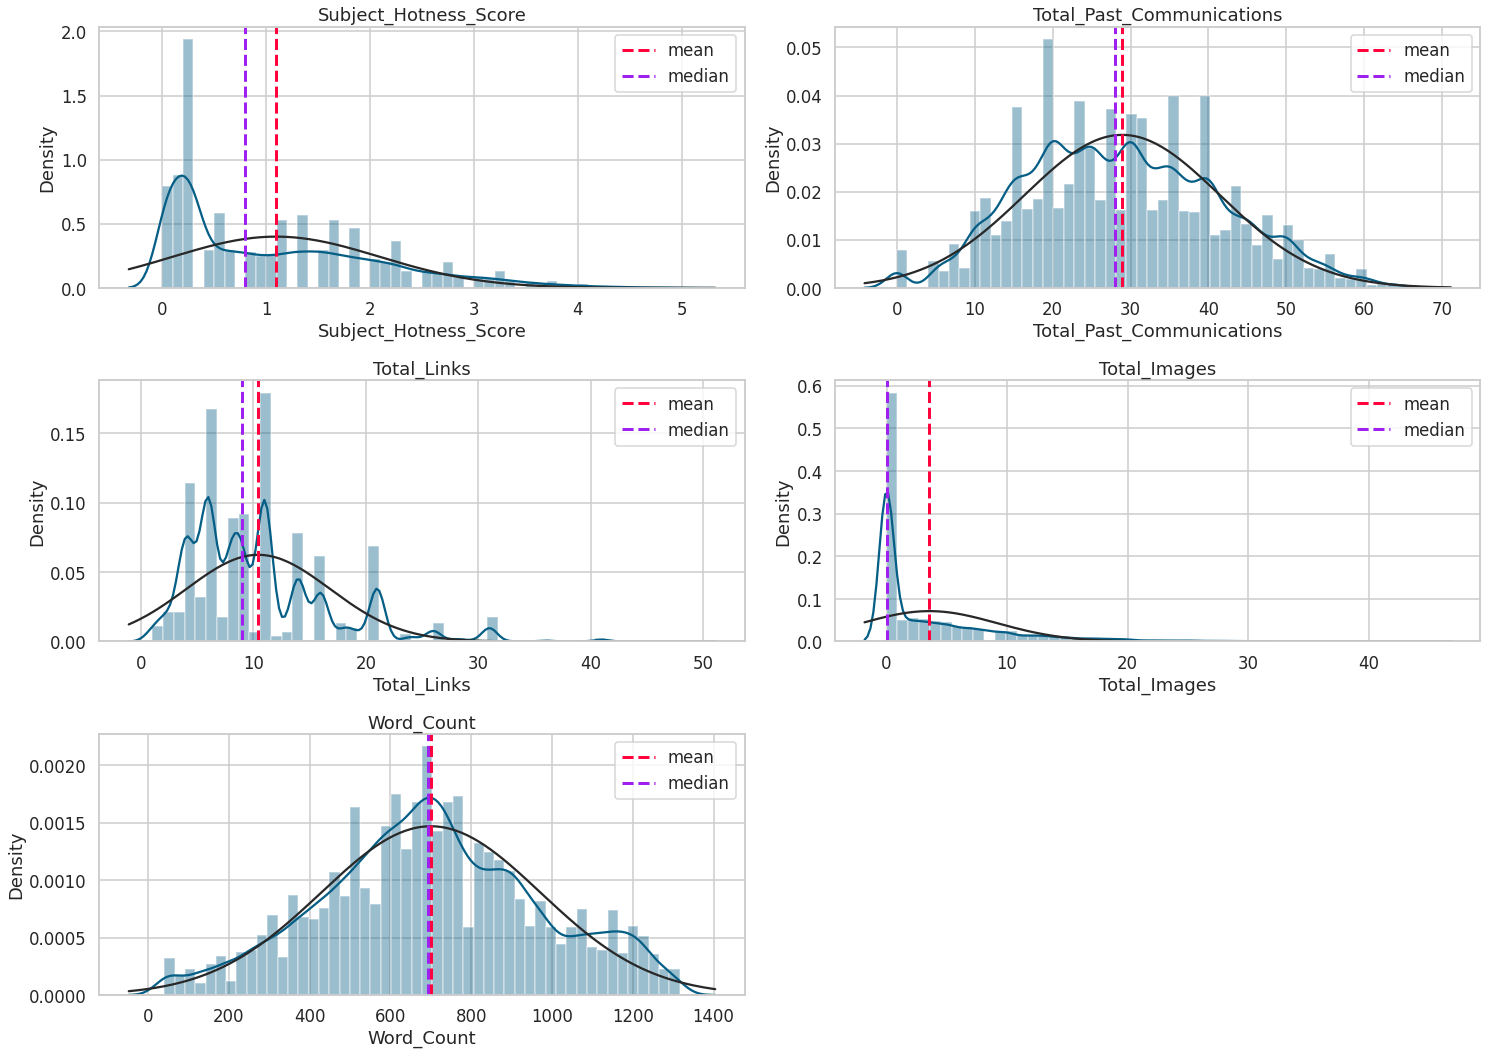

In [ ]:
# Chart - 1 visualization code numerical feature
graph = plt.figure(figsize = (21,29))
for i,col in enumerate(num_feature) :
    sns.set_style("whitegrid")
    sns.set_context("talk");
    plt.subplot(6,2,i+1);
    sns.distplot(df[col], color = '#055E85', fit = norm);
    feature = df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();


##### 1. Why did you pick the specific chart?

above distpolt is a combination of both histogram and KDE plot,for plotting continous variable and understanding the distribution  it is the best.

##### 2. What is/are the insight(s) found from the chart?

 Subject hotness score, total image, and total links all displayed a positive skew, indicating that these variables tended to have more values on the higher end of the distribution. On the other hand, word count and total communication count displayed a somewhat normal distribution, with values distributed more evenly across the range.


When examining the average values of these variables, I found that,
* Total links has an average value of 10 
* Total image has an average value of 3
* Word count has an average value of 700
* Subject hotness score has an average of value 1
* Total communication has an average of value 30



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The plot that was created to understand the distribution of each variable is an important step in building a model for an effective email campaign. 

we can **gain insight into the characteristics of the data and identify any outliers or missing values that may need to be addressed.**

 However, it is important to note that this plot alone is not sufficient to predict negative growth.


###Effect of Email Type 

There are two types,

Type 1 = Marketing

Type 2 = Important Notice

#### Chart - 2 Enagement Based on Email Type

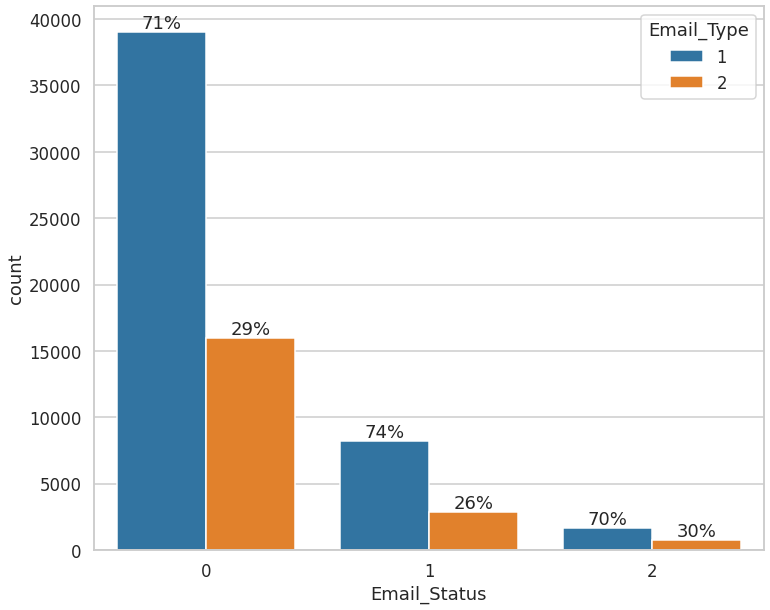

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Email_Type'])
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
    catbars=bars[i:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")
plt.show()

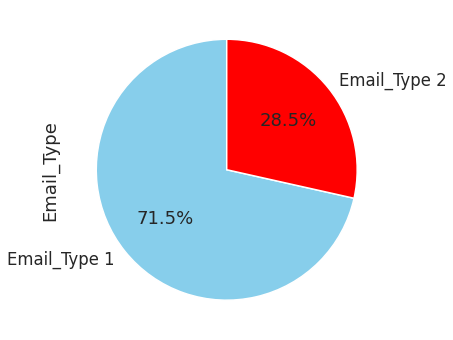

In [ ]:
#pie chart for distribution of each email type
df['Email_Type'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['Email_Type 1','Email_Type 2'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              );

##### 1. Why did you pick the specific chart?

Count plot displays the frequency of each category in a bar chart format, making it **easy to compare the count of individual categories.**

pie plot displays the proportion of each category in a circular chart format. Used to understand the **relative size of each category** in relation to the whole.

##### 2. What is/are the insight(s) found from the chart?

overall most of the emails are ignored.

there are 71% are of type 1, out of which 71% are ignored i.e., so only 29% of type 1 shows open rate.

also 29% emails are of type 2, out of which 29% percent are ignored i.e., 71% of type 2 showed open rate.

Type 2 emails were more acknowledged as compare to type-1.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This plot helps in understanding engagement of emails but this graph was incapable to produce any business impact other than visualizing the curiosity of engagement.

#### Chart - 3 Engagement based on Email Type with all numerical features

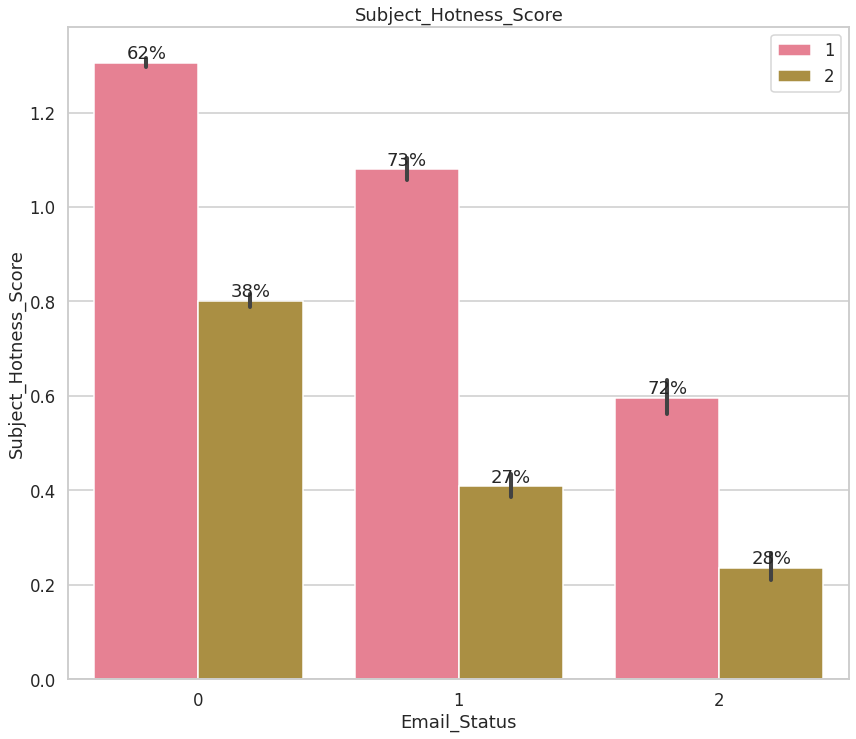

------------------------------------------------------------------------------------------------------------------------


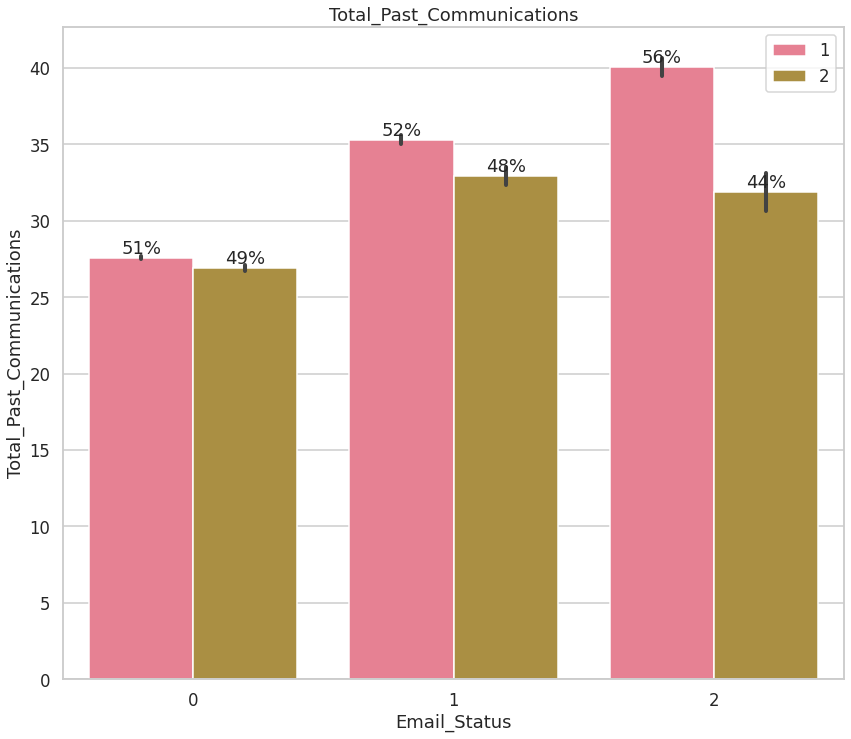

------------------------------------------------------------------------------------------------------------------------


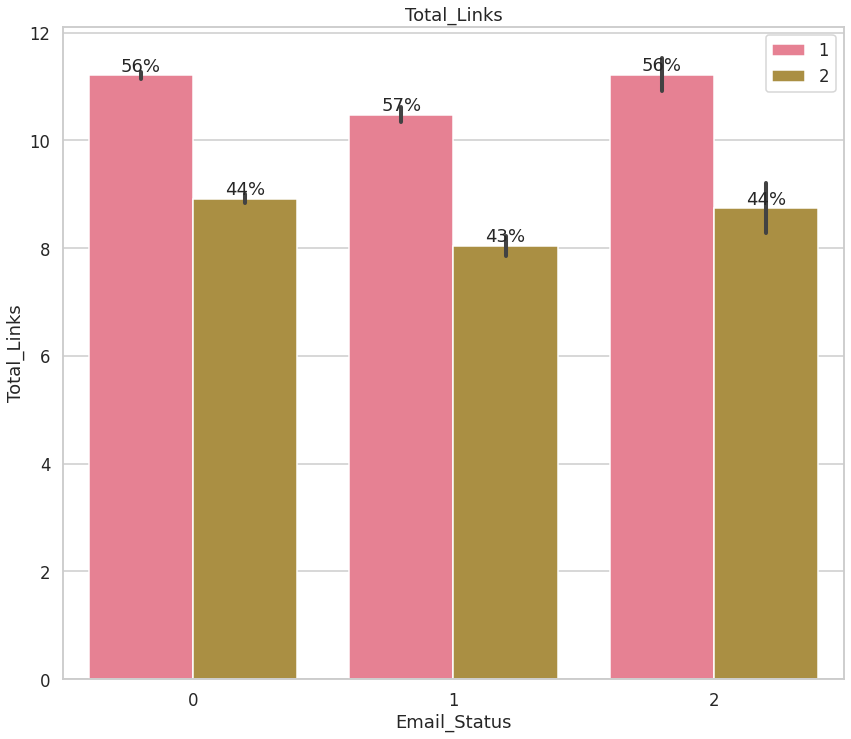

------------------------------------------------------------------------------------------------------------------------


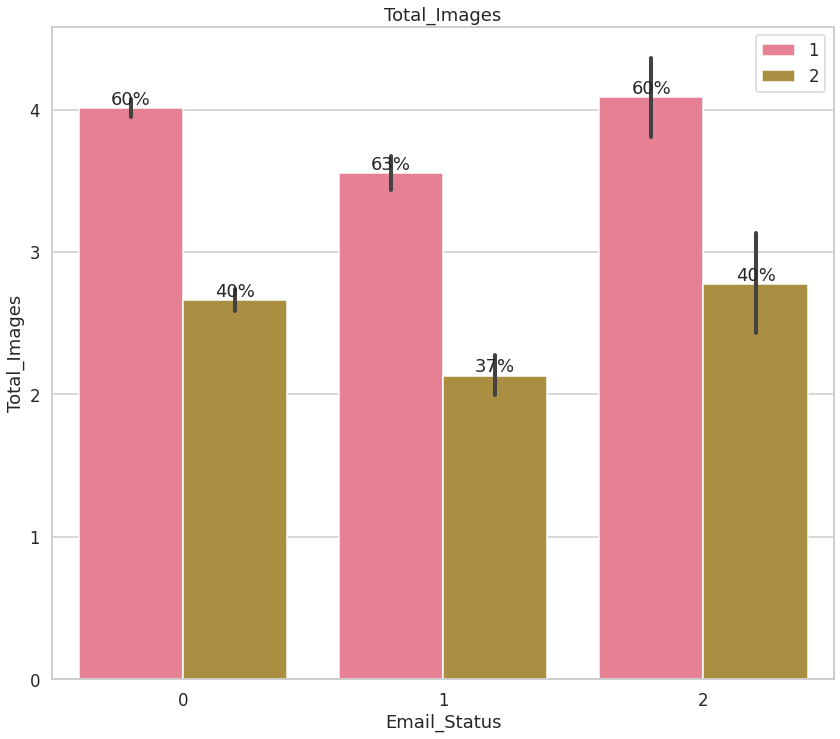

------------------------------------------------------------------------------------------------------------------------


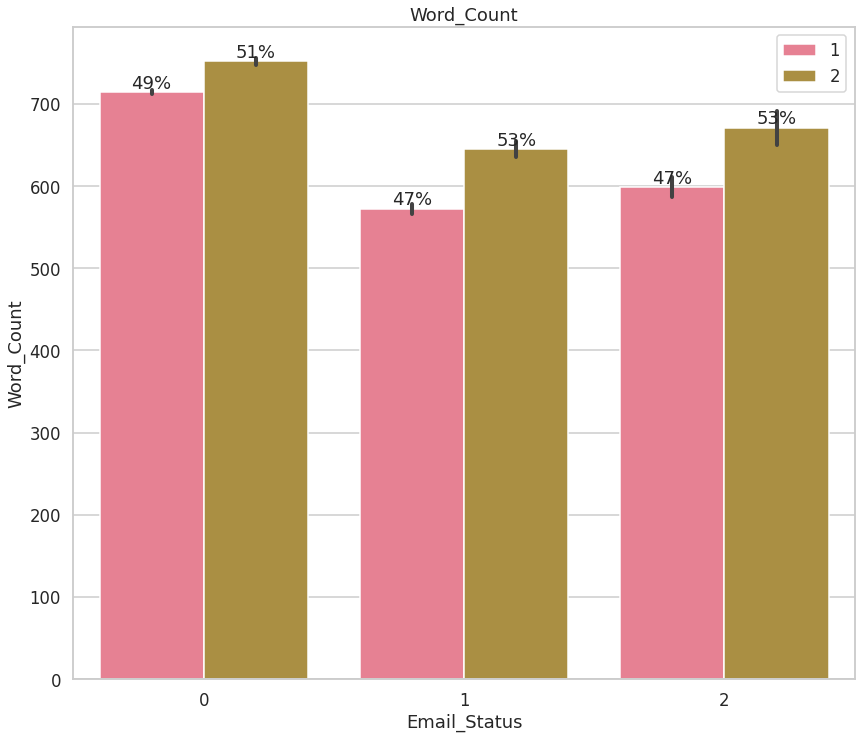

------------------------------------------------------------------------------------------------------------------------


In [ ]:
## Chart - 3 visualization code

# setting the color palette and style for the plot
sns.set_palette("husl")
sns.set_style("whitegrid")

# iterating over each numerical feature in 'num_feature' list
for val in num_feature:
    # setting figure size
    plt.figure(figsize=(14, 12))
    # creating the barplot
    ax = sns.barplot(data=df, x='Email_Status', y=val, hue='Email_Type')
    # getting the number of unique categories in 'Email_Status'
    unique = len([x for x in df['Email_Status'].unique()])
    bars = ax.patches
    # iterating over each unique category
    for i in range(unique):
        catbars = bars[i:][::unique]
        # getting the total height of bars in the category
        total = sum([x.get_height() for x in catbars])
        # displaying the percentage of each bar in the category
        for bar in catbars:
            ax.text(bar.get_x() + bar.get_width() / 2.,
                    bar.get_height(),
                    f'{bar.get_height() / total:.0%}',
                    ha="center", va="bottom")
    # setting legend position
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    # setting plot title
    plt.title(val)
    # displaying the plot
    plt.show()
    # printing separator
    print('-' * 120)


##### 1. Why did you pick the specific chart?

**for understanding of both discrete and continous data bar plot is usefel.**

Barplot shows frequency counts of values for categorical variables, and can also display other statistics like percentages. A bar chart was used to show the average percentage of Email type with respect to Email status.

##### 2. What is/are the insight(s) found from the chart?

This graph shows that past communication plays a key role in improving email engagement, along with an average word count of 600, subject hotness score of 0.6, and 10 links and 3 images in the content. The higher the number of past communications, the better the engagement.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Marketing emails tend to be ignored more often than important notices, so it's important to prioritize two-way communication and avoid using "no-reply" email addresses. 

Additionally, marketing emails have a low click-through or conversion rate, which can negatively impact business growth and revenue if email marketing is a key strategy.

###Effect of Email Campaign Type

#### Chart - 4 Email Campaign Type

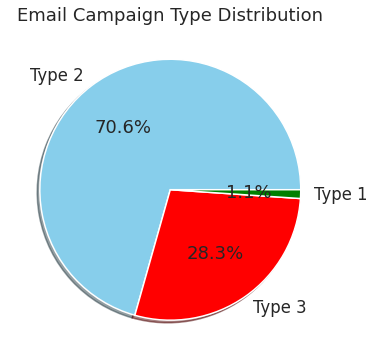

In [ ]:
# Chart - 4 visualization code
# Get value counts for each Email Campaign Type
campaign_counts = df['Email_Campaign_Type'].value_counts()

# Set up pie chart figure
fig, ax = plt.subplots(figsize=(15, 6))

# Plot pie chart
ax.pie(campaign_counts, 
       labels=['Type 2','Type 3', 'Type 1'], 
       colors=['skyblue','red','green'], 
       autopct=lambda pct: f"{pct:.1f}%", 
       shadow=True)

# Add title
ax.set_title('Email Campaign Type Distribution')

# Show chart
plt.show()


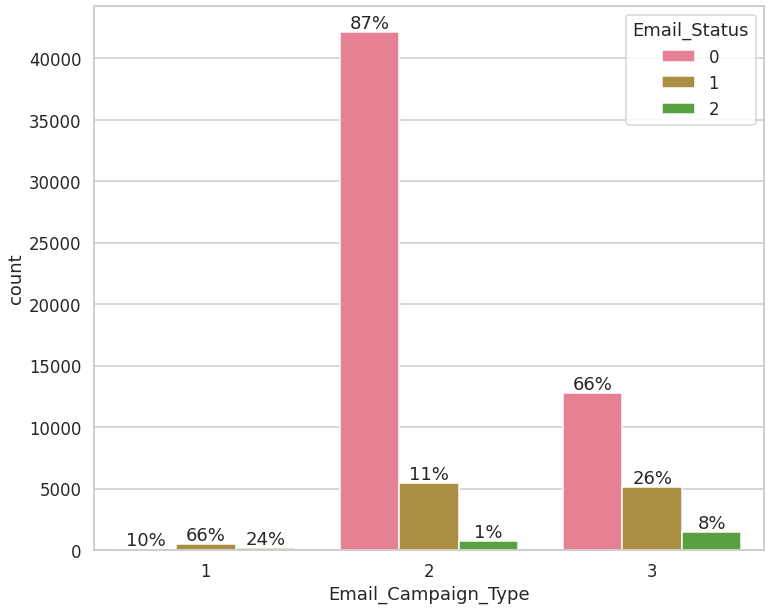

In [ ]:
#bar plot for understanding how email status is affected by campign type 
plt.figure(figsize = (12,10))
ax = sns.countplot(x=df['Email_Campaign_Type'], hue=df['Email_Status'])
unique = len([x for x in df['Email_Campaign_Type'].unique()])
bars = ax.patches
for w in range(unique):
    catbars=bars[w:][::unique]
    #get height
    total = sum([x.get_height() for x in catbars])
    #print percentage
    for bar in catbars:
      ax.text(bar.get_x()+bar.get_width()/2.,
                  bar.get_height(),
                  f'{bar.get_height()/total:.0%}',
                  ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

Barplot helps in understanding of both discrete and continous data data. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of Email campaign type with respect to Email status, I have used Bar Chart.

Pie chart show the proportion of each caetgory.

##### 2. What is/are the insight(s) found from the chart?

Email campaign 1, even though has very small quantity but open rate for those email are way more than others.

Email campaign type 2 show most of the emails as ignored and only 1% of acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Company should increase campaign type 1 as it show more engagement and stop campaign 2 as its most of the emails are ignored.


###Effect of Location

#### Chart - 5 Location with most Email Acknowledged

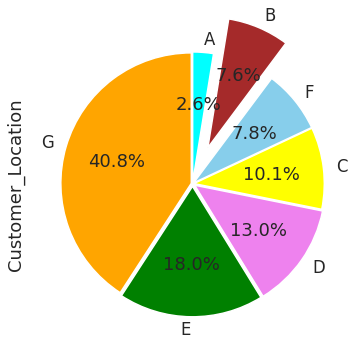

In [ ]:
# Chart - 5 visualization code
#pie chart for distribution of each email campaign type
df['Customer_Location'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               labels=['G','E', 'D','C','F','B','A'],
                               colors=['orange','green','violet','yellow','skyblue','brown','cyan','red'],
                               explode=[0.01,0.02,0.02,0.01,0.01,0.3,0.01]
                              );


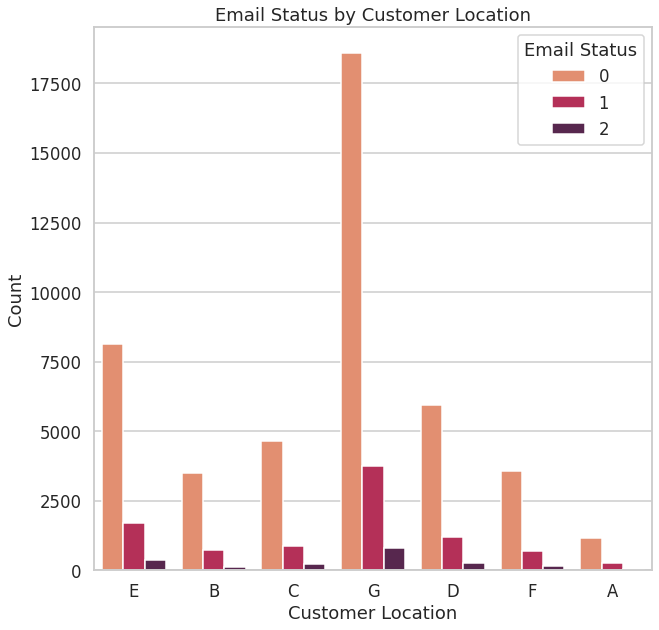

In [ ]:
#based on location identifying how email status changed
plt.figure(figsize=(10,10))
sns.countplot(x=df['Customer_Location'], hue=df['Email_Status'], palette='rocket_r')
plt.legend(title='Email Status', loc='upper right')
plt.title('Email Status by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.show()

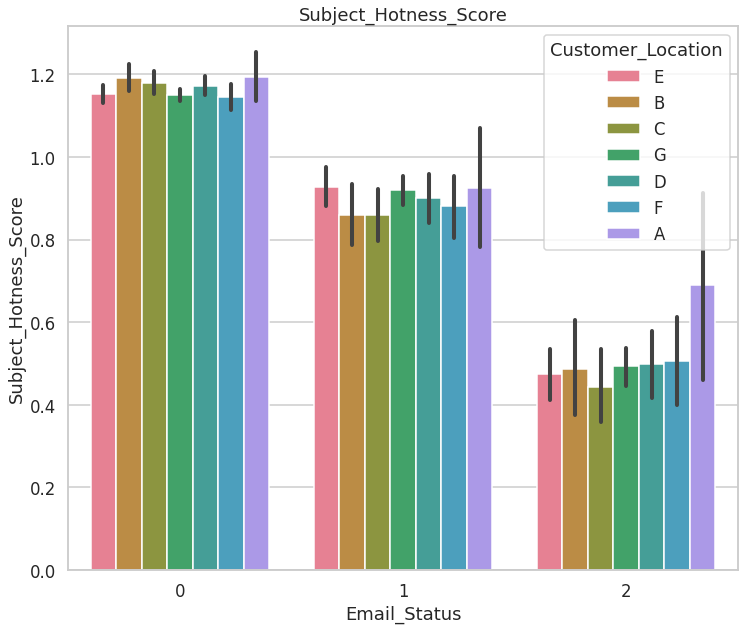

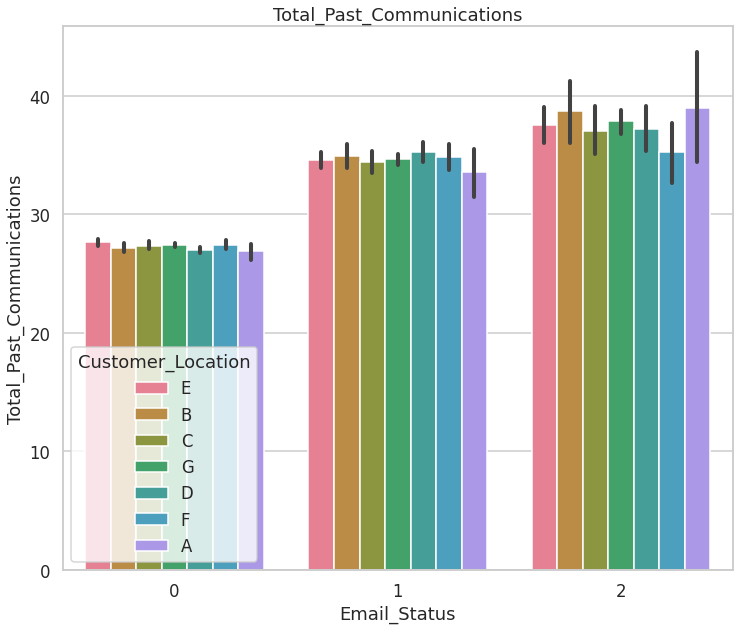

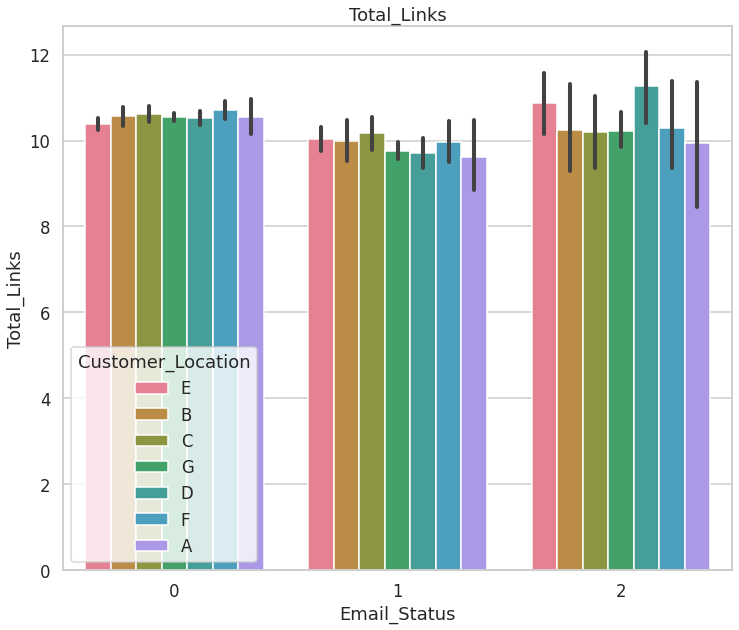

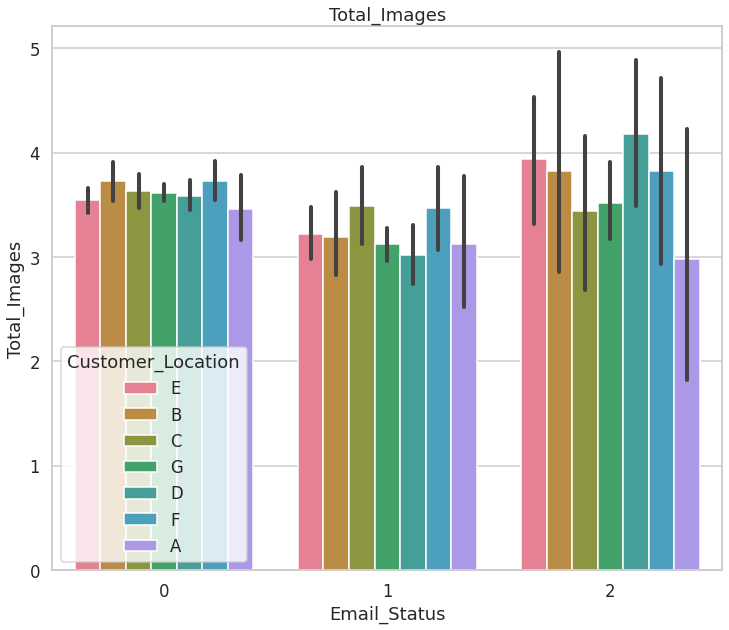

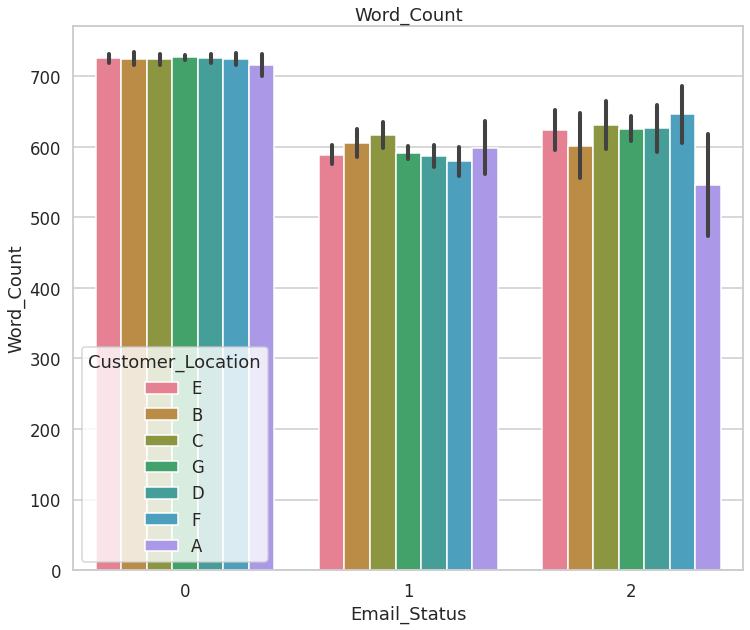

In [ ]:
#checking effect of location on other numerical features
# set the color palette
palette = sns.color_palette("husl", len(df['Customer_Location'].unique()))

# loop through each numerical feature
for feature in num_feature:
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(data=df, x='Email_Status', y=feature, hue='Customer_Location', palette=palette)
    plt.title(feature)
    plt.show()
    print('='*120)

##### 1. Why did you pick the specific chart?

for frequency understanding of each catgeory this plot is very useful

##### 2. What is/are the insight(s) found from the chart?

Despite sending a relatively low number of emails to Location C, it has received the highest level of engagement with the maximum number of communications and acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sending more emails to Location C, instead of Location G where emails are ignored and acknowledged less, could improve the conversion rate and prevent potential revenue loss.

###analysis of time when email was sent

#### Chart - 6

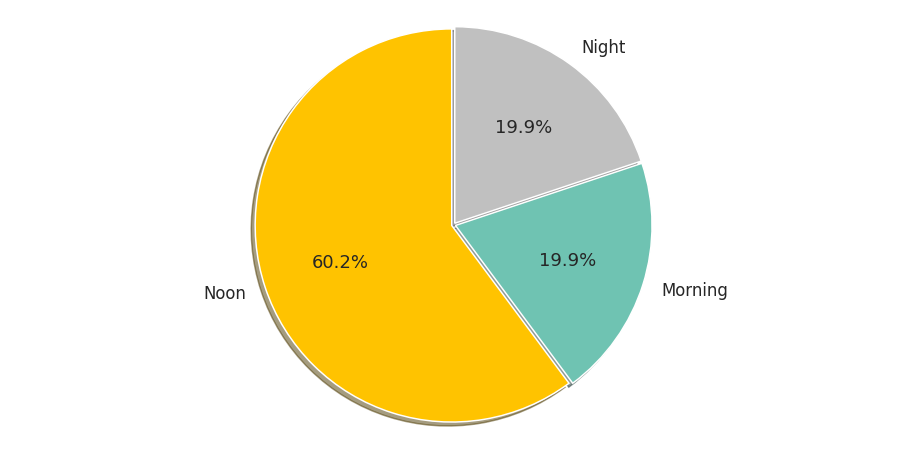

In [ ]:
# Chart - 6 visualization code
#pie chart for distribution of email based on time period
sizes = df['Time_Email_sent_Category'].value_counts().values
labels = ['Noon','Morning', 'Night']
colors = ['#FFC300','#6FC3B2','#C0C0C0']
explode = [0.01,0.01,0.01]
plt.figure(figsize=(16,8))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

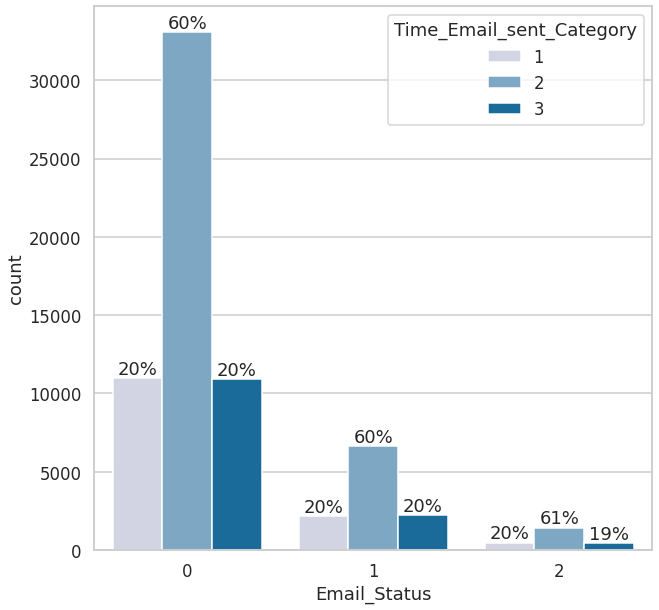

In [ ]:
#bar plot for understanding how email status is affected by Time_Email_sent
plt.figure(figsize = (10,10))
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'], palette='PuBu')
unique = len([x for x in df['Email_Status'].unique()])
bars = ax.patches
for i in range(unique):
  catbars=bars[i:][::unique]
  #get height
  total = sum([x.get_height() for x in catbars])
  #print percentage
  for bar in catbars:
    ax.text(bar.get_x()+bar.get_width()/2.,
            bar.get_height(),
            f'{bar.get_height()/total:.0%}',
            ha="center",va="bottom")

##### 1. Why did you pick the specific chart?

While the pie chart reveals the distribution, the count plot illustrates the impact of time on email treatment.

##### 2. What is/are the insight(s) found from the chart?

Despite 60% of emails being sent in the afternoon with 60% being ignored, emails sent during morning and night are more likely to be acknowledged due to their equal percentage and higher open rates.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Timing is crucial in email marketing, as people tend to plan their day in the morning or night, making those times ideal for sending emails that are more likely to be acknowledged, leading to higher impressions and improved conversion rates.

While emails sent during the afternoon showed a high rate of being ignored, sending emails at the right time can prevent potential losses as those emails are less likely to be acknowledged.

### Chart - 7 According to Total Past Communication

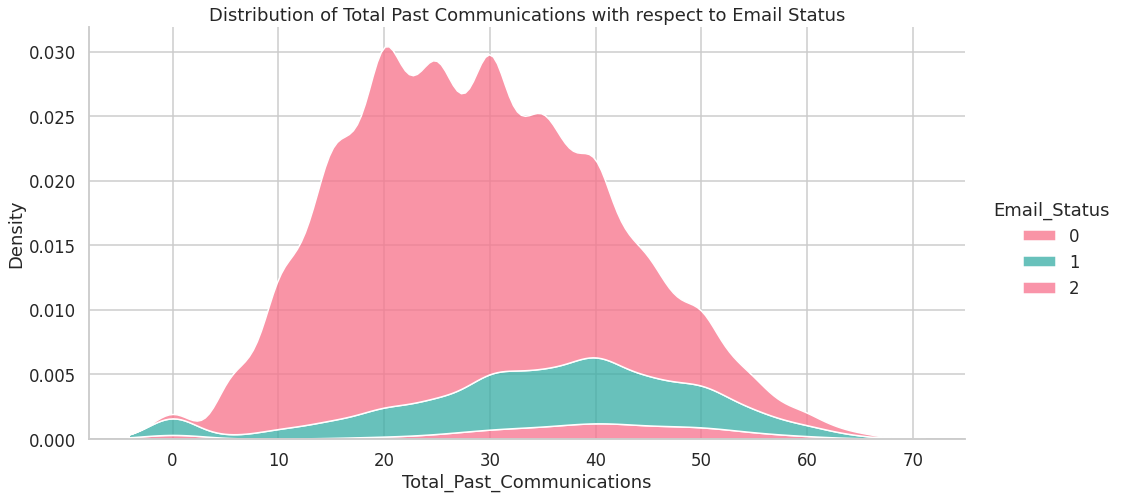

In [ ]:
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data = df, 
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='husl');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

##### 1. Why did you pick the specific chart?

for comparing the probability density functions of multiple features stacked charts are very useful.

##### 2. What is/are the insight(s) found from the chart?

The density reveals that there is a strong correlation between a high number of ignored emails and a lower frequency of communication, compared to acknowledged emails.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Effective communication with customers is crucial, as merely sending marketing emails may not suffice; while the density plot provides distribution information, it may not be sufficient to drive business impact.

### Chart - 8 - Correlation Heatmap

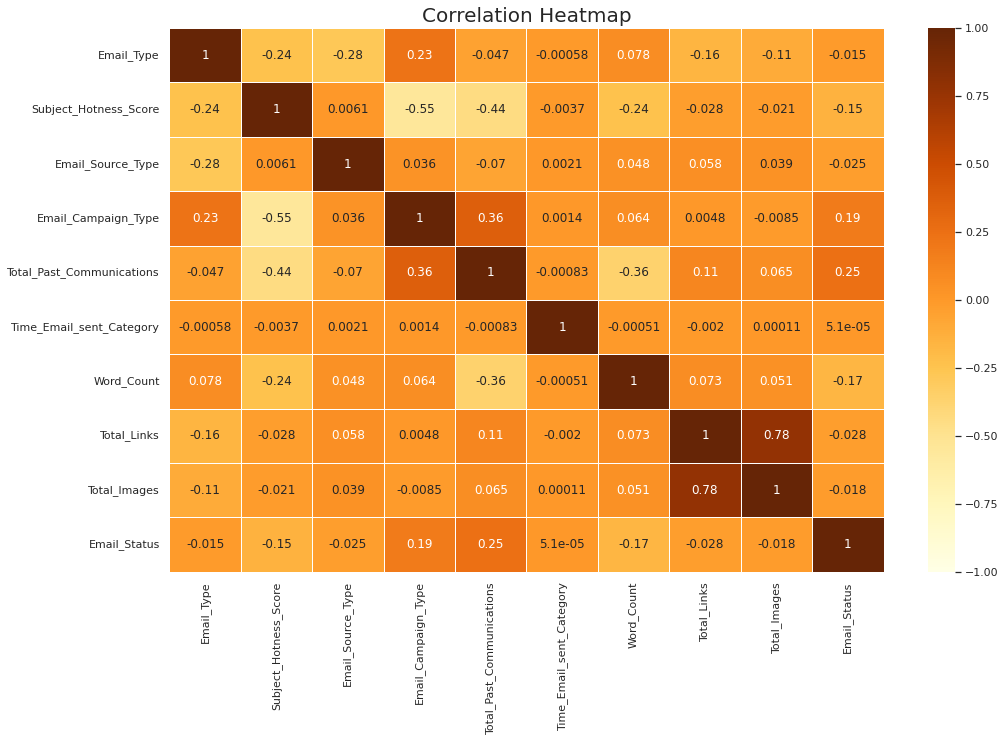

In [ ]:
sns.set_context('notebook')
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap="YlOrBr", linewidths=.5);
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table that displays correlation coefficients between variables, with values ranging from -1 to 1, and a correlation heatmap is a tool that allows for visualization of the correlations between variables, aiding in data summarization, input for advanced analysis, and diagnostics.

##### 2. What is/are the insight(s) found from the chart?

total links and images shows multicollinearity with correlation of 0.78 

### Chart - 9 - Pair Plot 

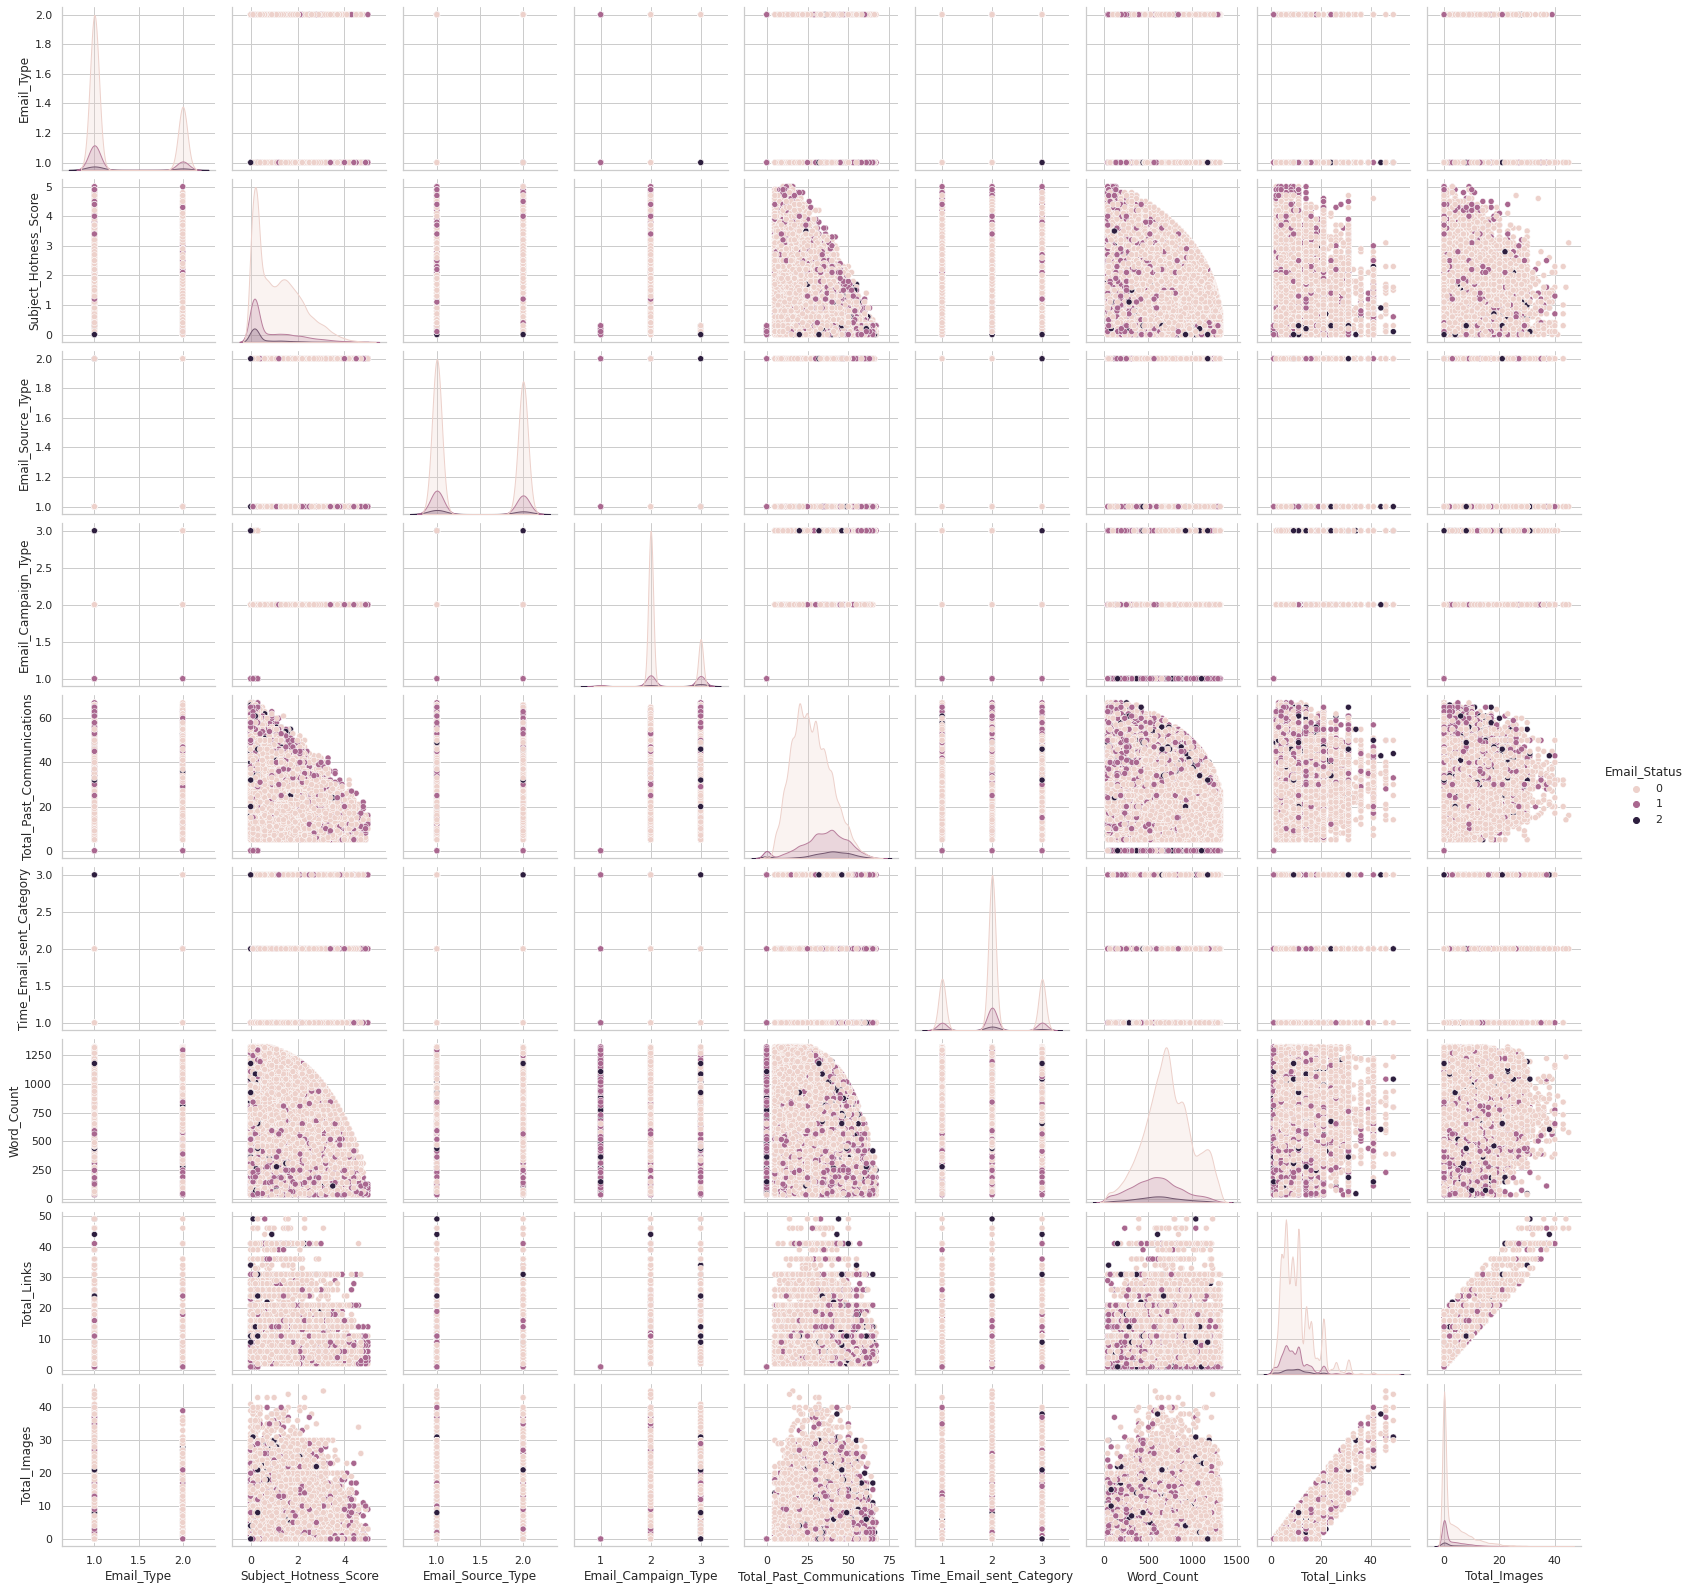

In [ ]:
# Pair Plot visualization
sns.pairplot(df, hue="Email_Status");

##### 1. Why did you pick the specific chart?

A pair plot is a graphical tool used to identify the optimal features to explain a relationship between two variables or form separate clusters and can be used to create simple classification models by drawing lines or making linear separations in the dataset.

Pair plot serves as a visual representation of the correlation matrix, providing insights into data patterns and feature relationships.

##### 2. What is/are the insight(s) found from the chart?

The analysis of the chart suggests that there is minimal linear relationship among the variables, likely due to the categorical nature of the majority of the data; however, a linear relationship between Total Links and Total Images was observed, which was previously noted in the heatmap analysis.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1)Email_Type is not a significant factor in predicting Email_Status.

2)Subject_Hotness_Score does not significantly affect Total_Past_Communications.

3)Customer_Location has no significant impact on the Total_Links and Total_Images in emails.

### Hypothetical Statement - 1
-----
Email_Type is not a significant factor in predicting Email_Status.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: no relationship between Email_Type and Email_Status (H0: B1 = 0)
* Alternative Hypothesis:relationship between Email_Type and Email_Status (H1: B1 ≠ 0)
* Test Type : chi-square test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# chi-square test of independence
contingency_table = pd.crosstab(df['Email_Type'], df['Email_Status'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

if p_value < 0.05:
    significance = "has a significant"
else:
    significance = "does not have a significant"

print(f"The Email_Type {significance} impact on the Email_Status.")

The Email_Type has a significant impact on the Email_Status.


##### Which statistical test have you done to obtain P-Value?

I used the chi-square test of independence to test the association between Email_Type and Email_Status. 

##### Why did you choose the specific statistical test?

 test suitable for evaluating the association between categorical variables

This test is appropriate for categorical variables

### Hypothetical Statement - 2

---
Subject_Hotness_Score does not significantly affect Total_Past_Communications.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis:no linear relationship between Subject_Hotness_Score and Total_Past_Communications, (H0: ρ = 0)

* Alternative Hypothesis:linear relationship between Subject_Hotness_Score and Total_Past_Communications, (H1: ρ ≠ 0)
* Test Type : Pearson's correlation test

#### 2. Perform an appropriate statistical test.

In [ ]:
#To perform the test on variable with null or infinity values, create a copy and handle those values.
data = df.copy()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.fillna(data.mean())

In [ ]:
# Performing Statistical Test to obtain P-Value
# performing correlation test

# Define variables
subject_score = data['Subject_Hotness_Score']
past_communications = data['Total_Past_Communications']

# Perform Pearson's correlation test
corr_coef, p_value = stats.pearsonr(subject_score, past_communications)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("The correlation coefficient is:", corr_coef, "\nReject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("The correlation coefficient is:", corr_coef, "\nFail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")

The correlation coefficient is: -0.41932000855776935 
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


In [ ]:
#performing non-parametric Spearman's rank correlation test
# Define variables
subject_score = data['Subject_Hotness_Score']
past_communications = data['Total_Past_Communications']

# Perform Spearman's rank correlation test
corr_coef, p_value = stats.spearmanr(subject_score, past_communications)

# Check if p-value is less than 0.05
if p_value < 0.05:
    print("The correlation coefficient is:", corr_coef, "\nReject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications")
else:
    print("The correlation coefficient is:", corr_coef, "\nFail to reject the null hypothesis - the Subject_Hotness_Score does not have a significant impact on the Total_Past_Communications")


The correlation coefficient is: -0.4096746825982255 
Reject the null hypothesis - the Subject_Hotness_Score has a significant impact on the Total_Past_Communications


##### Which statistical test have you done to obtain P-Value?

I utilized Pearson's correlation analysis to assess the linear relationship between the continuous variables of Subject_Hotness_Score and Total_Past_Communications.

##### Why did you choose the specific statistical test?

As the variables are continuous and the aim is to establish a linear association between them, Pearson's correlation test is suitable.

### Hypothetical Statement - 3
---
Customer_Location has no significant impact on the Total_Links and Total_Images in emails.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: The mean of Total_Links is equal among the location (A, B, C, D, E, F, G) (H0: μ1 = μ2 = μ3 = μ4 = μ5 = μ6 = μ7)
* Alternative Hypothesis: The mean of Total_Links is not equal among the location (A, B, C, D, E, F, G) (H1: at least one mean is different from the others)
* Test Type : ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Performing Statistical Test to obtain P-Value
# performing ANOVA test

# Create subsets of data based on the Customer_Location column
loc_A = df[df['Customer_Location'] == 'A']['Total_Links']
loc_B = df[df['Customer_Location'] == 'B']['Total_Links']
loc_C = df[df['Customer_Location'] == 'C']['Total_Links']
loc_D = df[df['Customer_Location'] == 'D']['Total_Links']
loc_E = df[df['Customer_Location'] == 'E']['Total_Links']
loc_F = df[df['Customer_Location'] == 'F']['Total_Links']
loc_G = df[df['Customer_Location'] == 'G']['Total_Links']

# Perform ANOVA test
f_value, p_value = stats.f_oneway(loc_A, loc_B, loc_C, loc_D, loc_E, loc_F, loc_G)

#f_value, p_value = stats.f_oneway(*[df.loc[df['Customer_Location'] == location, 'Total_Links'] for location in grouped_data.index])

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# performing Kruskal-Wallis test
# Group data by customer location and extract Total_Links data for each group
# grouped_data = [df.loc[df['Customer_Location'] == location, 'Total_Links'] for location in df['Customer_Location'].unique()]
grouped_data=[df[df['Customer_Location'] == 'A']['Total_Links'], 
              df[df['Customer_Location'] == 'B']['Total_Links'],
              df[df['Customer_Location'] == 'C']['Total_Links'],
              df[df['Customer_Location'] == 'D']['Total_Links'], 
              df[df['Customer_Location'] == 'E']['Total_Links'],
              df[df['Customer_Location'] == 'F']['Total_Links'],
              df[df['Customer_Location'] == 'G']['Total_Links']]
# Perform Kruskal-Wallis test
stat, p_value = stats.kruskal(*grouped_data)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


##### Which statistical test have you done to obtain P-Value?

ANOVA is utilized to establish if there is a significant variance among the averages of two or more sets.(significant difference in the means of two or more groups.)

##### Why did you choose the specific statistical test?

To verify significant dissimilarities amid the average Total_Links among diverse locations (A-G), ANOVA is suitable due to Total_Links being continuous and multiple group means comparison required.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

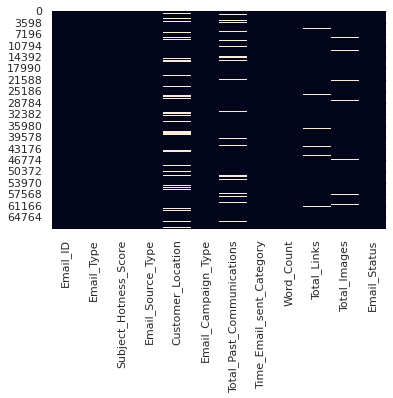

In [ ]:
# Handling Missing Values & Missing Value Imputation

sns.heatmap(df.isnull(), cbar=False);

In [ ]:
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

As the customer location is a categorical variable and the missing value cannot be determined, the mode is the optimal method to replace null values.

In [ ]:
#replacing null value in customer location using mode
df['Customer_Location'].fillna(df['Customer_Location'].mode()[0], inplace = True)

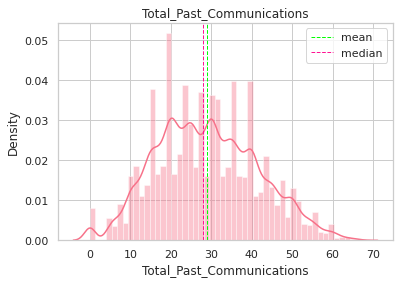

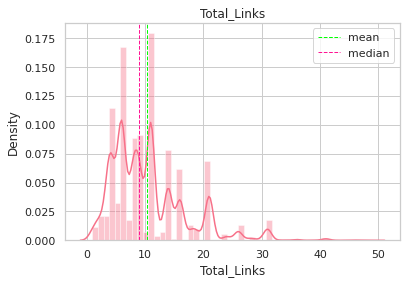

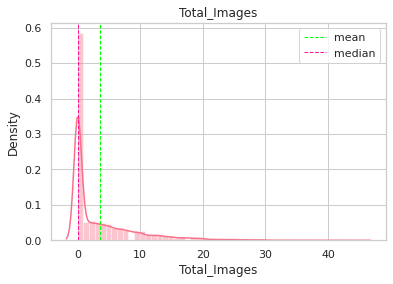

In [ ]:
#checking distribution of other null value to find correct way to impute

# Define the colors for mean and median lines
mean_color = '#00ff00' # green
median_color = '#ff1493' # deep pink

# Loop through the categories and plot the histograms
for cat in ['Total_Past_Communications','Total_Links','Total_Images']:
    sns.distplot(x=df[cat], hist= True);
    feature = df[cat]
    plt.axvline(feature.mean(), color=mean_color, linestyle='dashed', linewidth=1,label= 'mean');
    plt.axvline(feature.median(), color=median_color, linestyle='dashed', linewidth=1,label='median');
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{cat.title()}');
    plt.xlabel(cat)
    plt.show()
    print('='*100)


Considering the almost normal distribution of only the Total_Past_Communication, mean is preferred; for the other two, with right skewness, median is preferred as it is more resistant to outliers.

In [ ]:
#replacing null values based on their distribution
df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].mean(), inplace = True)
df['Total_Images'].fillna(df['Total_Images'].median(), inplace = True)
df['Total_Links'].fillna(df['Total_Links'].median(), inplace = True)

In [ ]:
df.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing value imputation techniques use central tendency limit theorem to replace null values, which assumes normality of sampling distribution of mean with large sample sizes. For categorical data like location, mode is the optimal replacement due to the inability to determine the missing value. For continuous data, mean/median is used depending on the distribution and skewness, where median is preferred for right-skewed data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
import scipy
skewness= [{num_col:scipy.stats.skew(df[num_col])} for num_col in num_feature ]

In [ ]:
skewness

[{'Subject_Hotness_Score': 0.8976826167024007},
 {'Total_Past_Communications': 0.22549674958248953},
 {'Total_Links': 1.4267516431080323},
 {'Total_Images': 2.1290649303131772},
 {'Word_Count': 0.012805348013819265}]

**Distribution :**
*  Skewness = 0: Then normally distributed.
*  Skewness < 0: Then more weight in the left tail of the distribution.
*  Skewness > 0: Then more weight in the right tail of the distribution.

In [ ]:
# Handling Outliers & Outlier treatments in numerical feature
# separate the symmetric and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in num_feature:
  if abs(df[i].mean()-df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

print("Symmetric Distributed Features : -",symmetric_feature)

print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Total_Past_Communications']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Total_Links', 'Total_Images', 'Word_Count']


In [ ]:
#upper and lower boundry For Skew Symmetric features.
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
  # print(f'feature: {feature} IQR:{IQR} lower: {lower_bridge} upper:{upper_bridge}')

In [ ]:
num_of_outliers=[]
for feature in num_feature:
  num_outliers = df[(df[feature] > outlier_treatment_skew(df, feature)[0]) | (df[feature] < outlier_treatment_skew(df, feature)[1])].shape[0]
  num_of_outliers.append({feature:num_outliers})

In [ ]:
num_of_outliers

[{'Subject_Hotness_Score': 247},
 {'Total_Past_Communications': 136},
 {'Total_Links': 1608},
 {'Total_Images': 5585},
 {'Word_Count': 0}]

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

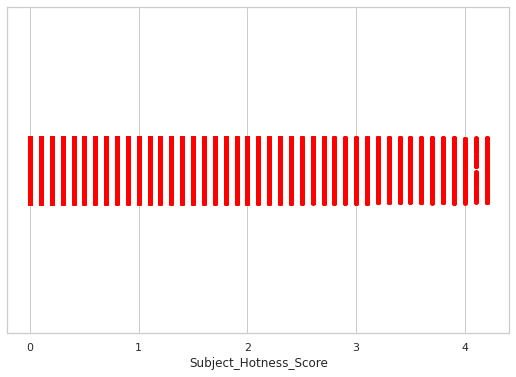

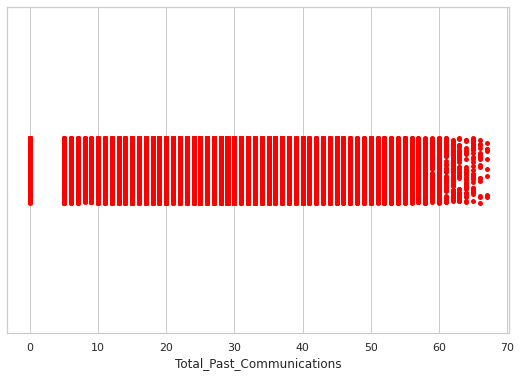

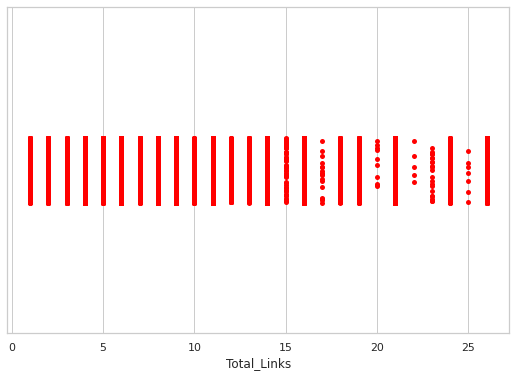

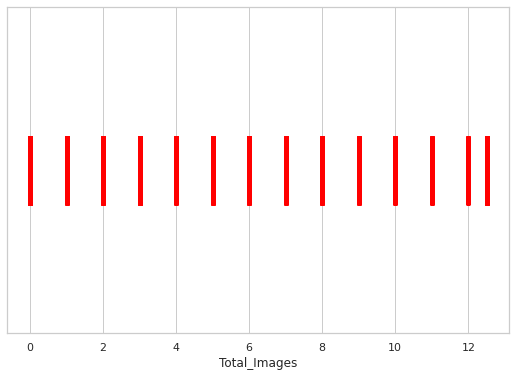

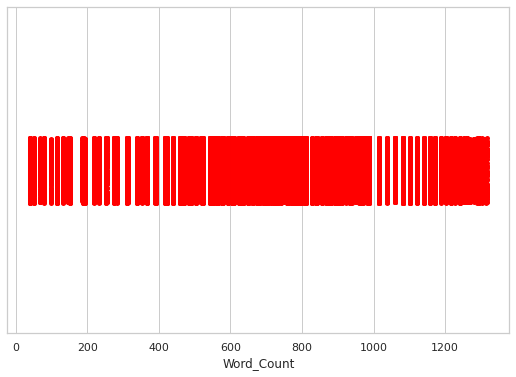

In [ ]:
# dataset distribution using strip plot after outlier treatment
#for the numerical columns 

for col in num_feature:
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.stripplot(x=df[col], color='red', size=5, ax=ax)
    ax.set_xlabel(col)
    plt.show()
    print('='*120)


##### What all outlier treatment techniques have you used and why did you use those techniques?

To remove outliers from numerical values, I used capping technique for non-symmetric data by setting the upper and lower limit values to the maximum and minimum value instead of eliminating them.

there is no symmetric data.

### 3. Categorical Encoding

In [ ]:
# Encoding your categorical columns
cat_col=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category','Customer_Location']


df2=pd.get_dummies(df, columns=cat_col, drop_first=True).reset_index().drop(columns=["index"])
df2.head()

Email_ID  Subject_Hotness_Score  Total_Past_Communications  \
0  EMA00081000034500                   2.20                      33.00   
1  EMA00081000045360                   2.10                      15.00   
2  EMA00081000066290                   0.10                      36.00   
3  EMA00081000076560                   3.00                      25.00   
4  EMA00081000109720                   0.00                      18.00   

   Word_Count  Total_Links  Total_Images  Email_Status  Email_Type_2  \
0      440.00         8.00          0.00             0             0   
1      504.00         5.00          0.00             0             1   
2      962.00         5.00          0.00             1             1   
3      610.00        16.00          0.00             0             0   
4      947.00         4.00          0.00             0             0   

   Email_Source_Type_2  Email_Campaign_Type_2  Email_Campaign_Type_3  \
0                    1                      1                      0   
1                    0                      1                      0   
2                    0                      0                      1   
3                    1                      1                      0   
4                    1                      0                      1   

   Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0                           0                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Customer_Location_G  
0                    1                    0                    0  
1                    0                    0                    1  
2                    0                    0                    0  
3                    1                    0                    0  
4                    0                    0                    0

In [ ]:
df2.shape

(68353, 19)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used OneHotEncoding.
OneHotEncoding transforms categorical variables into a format that can be utilized by ML algorithms to improve their predictive performance.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulating Features to minimize feature correlation and create new features
df2.drop(columns = ['Email_ID'], inplace = True)

We can merge 'Total_Links' and 'Total_Images' to form a new feature and remove the individual features due to their high correlation.

In [ ]:
# Total Number of Images and link
df2['Images_plus_link'] = df2['Total_Images'] + df2['Total_Links']

In [ ]:
# Number of Images per link
df2['Images_per_link'] = df2['Total_Images'] / df2['Total_Links']

In [ ]:
#combining total image and total link to find its percentage in total word count

df2['Percentage_of_words_that_are_links_image'] = ((df2['Total_Links']+ df2['Total_Images'])/ df2['Word_Count'])*100

In [ ]:
#dropping total link and image 
df2.drop(columns = ['Total_Links','Total_Images'], inplace = True)

In [ ]:
#replacing infinity values with 0
np.isinf(df2).values.sum()
df2.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
df2.head(1)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                   2.20                      33.00      440.00             0   

   Email_Type_2  Email_Source_Type_2  Email_Campaign_Type_2  \
0             0                    1                      1   

   Email_Campaign_Type_3  Time_Email_sent_Category_2  \
0                      0                           0   

   Time_Email_sent_Category_3  Customer_Location_B  Customer_Location_C  \
0                           0                    0                    0   

   Customer_Location_D  Customer_Location_E  Customer_Location_F  \
0                    0                    1                    0   

   Customer_Location_G  Images_plus_link  Images_per_link  \
0                    0              8.00             0.00   

   Percentage_of_words_that_are_links_image  
0                                      1.82

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df2.shape

(68353, 19)

#####Feature selection by removing columns from a dataset that have a low variance

 Constant and quasi-constant features are those features that have very low or zero variance across the dataset. Such features do not contribute much to the prediction model as they do not provide any useful information.

In [ ]:
# Constant and Quasi Constant Feature need to be dropped
from sklearn.feature_selection import VarianceThreshold

def dropping_constant(data):
    selector = VarianceThreshold(threshold=0.05)
    selector.fit(data)
    constant_columns = data.columns[~selector.get_support()].tolist()
    
    if "Email_Status" in constant_columns:
        constant_columns.remove("Email_Status")
        
    print(f"Columns dropped: {constant_columns}")
    return data.drop(constant_columns, axis=1)


# def dropping_constant(data):
  # from  sklearn.feature_selection import VarianceThreshold
  # var_thres= VarianceThreshold(threshold=0.05)
  # var_thres.fit(data)
  # concol = [column for column in data.columns 
          # if column not in data.columns[var_thres.get_support()]] 
          #var_thres.get_support() return boolean values on checking condition

In [ ]:
# Calling the function
df_removed_var=dropping_constant(df2)

Columns dropped: []


In [ ]:
#correlation matrix
corr = df_removed_var.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt"), 
                        ("color", "black"), 
                        ("font-family", "Helvetica")]),
            dict(selector="td",
                 props=[('padding', "0.2em 0.5em"), 
                        ("color", "black"), 
                        ("font-family", "Helvetica")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt"), 
                        ("color", "blue"), 
                        ("text-decoration", "underline"), 
                        ("cursor", "pointer")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'), 
                        ('font-size', '12pt'), 
                        ('background-color', 'lightgray')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 
                       'font-size': '10pt', 
                       'font-weight': 'bold', 
                       'font-family': 'Helvetica'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())


#####Multicolinearity

In [ ]:
# Calculating VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# Checking Variable Inflation Factor # the independent variables set
X = df_removed_var.copy()

# create a list to hold the VIF values
vif_values = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# create a DataFrame to hold the feature names and VIF values
vif_data = pd.DataFrame({'feature': X.columns, 'VIF': vif_values})

# round the VIF values to 2 decimal places
vif_data['VIF'] = vif_data['VIF'].round(2)

# filter for features with VIF values greater than or equal to 8 and print the feature names
high_vif_features = vif_data[vif_data['VIF'] >= 8]['feature'].values
for feature in high_vif_features:
    print(feature)

Total_Past_Communications
Word_Count
Email_Campaign_Type_2
Email_Campaign_Type_3
Customer_Location_G


In [ ]:
#function for Checking Feature Correlation and finding multicolinearity
def correlation(df, threshold):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = upper_triangle.stack()[upper_triangle.stack() > threshold].index.tolist()
    col_corr = [col[1] for col in col_corr]
    return col_corr

In [ ]:
correlation(df_removed_var,0.6)

['Email_Campaign_Type_2',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_3',
 'Images_per_link']

In [ ]:
#dropping highly correlated values
df_new=df_removed_var.drop(['Email_Campaign_Type_2','Customer_Location_G'],axis=1)
df_new.shape

(68353, 17)

In [ ]:
df_new.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                   2.20                      33.00      440.00             0   
1                   2.10                      15.00      504.00             0   
2                   0.10                      36.00      962.00             1   
3                   3.00                      25.00      610.00             0   
4                   0.00                      18.00      947.00             0   

   Email_Type_2  Email_Source_Type_2  Email_Campaign_Type_3  \
0             0                    1                      0   
1             1                    0                      0   
2             1                    0                      1   
3             0                    1                      0   
4             0                    1                      1   

   Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0                           0                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Images_plus_link  \
0                    1                    0              8.00   
1                    0                    0              5.00   
2                    0                    0              5.00   
3                    1                    0             16.00   
4                    0                    0              4.00   

   Images_per_link  Percentage_of_words_that_are_links_image  
0             0.00                                      1.82  
1             0.00                                      0.99  
2             0.00                                      0.52  
3             0.00                                      2.62  
4             0.00                                      0.42

In [ ]:
# Again checking VIF post-dropped features
# the independent variables set
X = df_new.copy()

# VIF dataframe
vif = pd.DataFrame()
# vif["feature"] = X.columns
vif = pd.DataFrame({"feature": X.columns})

# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["VIF"] = vif_data["VIF"].apply(lambda x: round(x, 2)) #vif = vif.round(2)

vif[vif["VIF"] >= 8]["feature"].apply(print)
# for feature in vif[vif["VIF"] >= 8]["feature"]:
    # print(feature)

Total_Past_Communications
Word_Count
Email_Campaign_Type_3
Time_Email_sent_Category_2
Images_per_link


1     None
2     None
6     None
7     None
15    None
Name: feature, dtype: object

In [ ]:
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ['Email_Status']]])

variables  VIF
0                      Subject_Hotness_Score 2.69
1                  Total_Past_Communications 5.38
2                                 Word_Count 6.38
3                               Email_Type_2 1.63
4                        Email_Source_Type_2 1.98
5                      Email_Campaign_Type_3 2.21
6                 Time_Email_sent_Category_2 3.74
7                 Time_Email_sent_Category_3 1.90
8                        Customer_Location_B 1.12
9                        Customer_Location_C 1.15
10                       Customer_Location_D 1.20
11                       Customer_Location_E 1.27
12                       Customer_Location_F 1.12
13                          Images_plus_link 6.27
14                           Images_per_link 2.69
15  Percentage_of_words_that_are_links_image 2.31

##### What all feature selection methods have you used  and why?

In feature selection, there are various methods to identify the most relevant features for model building. One such method is the VIF method, which involves the removal of features with high variance inflation factors (VIFs).

The VIF method involves three steps. First, the VIF factors are calculated for each feature. Second, the VIF factors for each predictor variable are inspected, and if the VIF is between 5-10, multicollinearity is likely present and the variable is considered for dropping. Finally, the VIFs are validated again for each feature to identify the final set of features to be used for model building.

To identify the most relevant features using the VIF method, I followed three steps. First, I dropped columns having constant or quasi-constant variance. Second, I used Pearson correlation to identify columns having multicollinearity and dropped them. Third, I validated the VIFs for each feature and found some features having a VIF of more than 5-10. I considered the threshold to be 8 and again manipulated some features and dropped multicollinear columns to make the VIF less than 8. This resulted in the final set of features to be used for model building. 

##### Which all features you found important and why?

In [ ]:
#important features
df_new.columns.to_list()

['Subject_Hotness_Score',
 'Total_Past_Communications',
 'Word_Count',
 'Email_Status',
 'Email_Type_2',
 'Email_Source_Type_2',
 'Email_Campaign_Type_3',
 'Time_Email_sent_Category_2',
 'Time_Email_sent_Category_3',
 'Customer_Location_B',
 'Customer_Location_C',
 'Customer_Location_D',
 'Customer_Location_E',
 'Customer_Location_F',
 'Images_plus_link',
 'Images_per_link',
 'Percentage_of_words_that_are_links_image']

In [ ]:
#defining fun- Embedded Method of validating the feature importances of selected features

from sklearn.ensemble import RandomForestClassifier

def randomforest_embedded(x, y):
    # create a random forest classifier with hyperparameters
    model = RandomForestClassifier(n_estimators=550)
    # fit the model
    model.fit(x, y)
    # get the feature importances
    importances = model.feature_importances_
    # create a DataFrame to store the feature importances
    feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
    # sort the features by importance in descending order
    feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
    return feature_importances


In [ ]:
# Getting feature importance of selected features
randomforest_embedded(x=df_new.drop(["Email_Status"],axis=1),y=df_new["Email_Status"])

Feature  Importance
15  Percentage_of_words_that_are_links_image        0.18
1                  Total_Past_Communications        0.18
2                                 Word_Count        0.17
0                      Subject_Hotness_Score        0.12
13                          Images_plus_link        0.11
14                           Images_per_link        0.07
5                      Email_Campaign_Type_3        0.03
6                 Time_Email_sent_Category_2        0.03
4                        Email_Source_Type_2        0.02
11                       Customer_Location_E        0.02
7                 Time_Email_sent_Category_3        0.02
10                       Customer_Location_D        0.02
9                        Customer_Location_C        0.01
3                               Email_Type_2        0.01
12                       Customer_Location_F        0.01
8                        Customer_Location_B        0.01

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transforming data and Getting symmetric and skew symmetric features from the columns

# Define empty lists for storing symmetric and non-symmetric features
symmetric_features = []
non_symmetric_features = []

# Loop through each column in the dataframe
for col in df_new.columns:
    # Calculate the difference between the mean and median
    diff = abs(df_new[col].mean() - df_new[col].median())
    
    # If the difference is less than 0.1, add the column to the symmetric features list
    if diff < 0.1:
        symmetric_features.append(col)
    # Otherwise, add the column to the non-symmetric features list
    else:
        non_symmetric_features.append(col)

# Print the lists of symmetric and non-symmetric features
print("Symmetric Distributed Features : -",symmetric_features)
print("Skew Symmetric Distributed Features : -",non_symmetric_features)


Symmetric Distributed Features : - ['Total_Past_Communications', 'Customer_Location_B', 'Customer_Location_C', 'Customer_Location_F']
Skew Symmetric Distributed Features : - ['Subject_Hotness_Score', 'Word_Count', 'Email_Status', 'Email_Type_2', 'Email_Source_Type_2', 'Email_Campaign_Type_3', 'Time_Email_sent_Category_2', 'Time_Email_sent_Category_3', 'Customer_Location_D', 'Customer_Location_E', 'Images_plus_link', 'Images_per_link', 'Percentage_of_words_that_are_links_image']


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


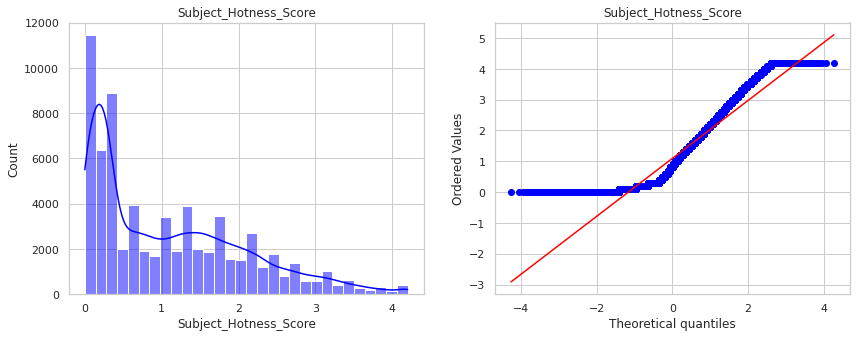

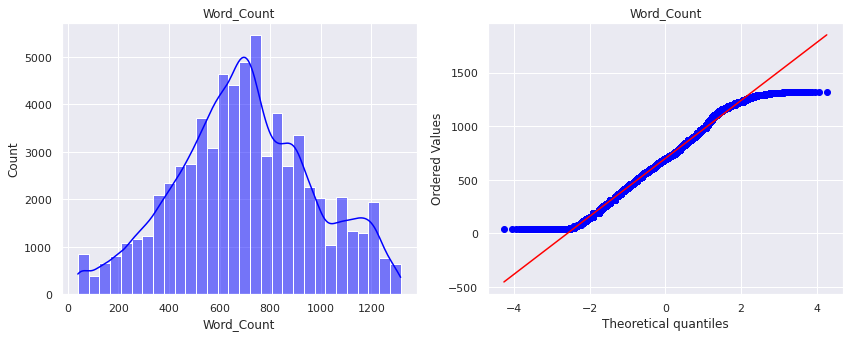

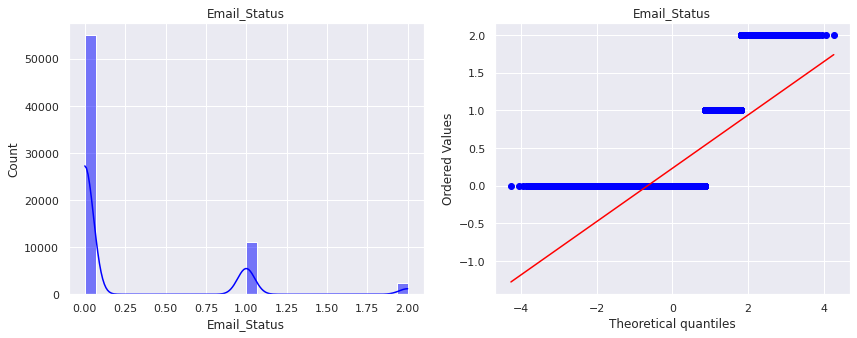

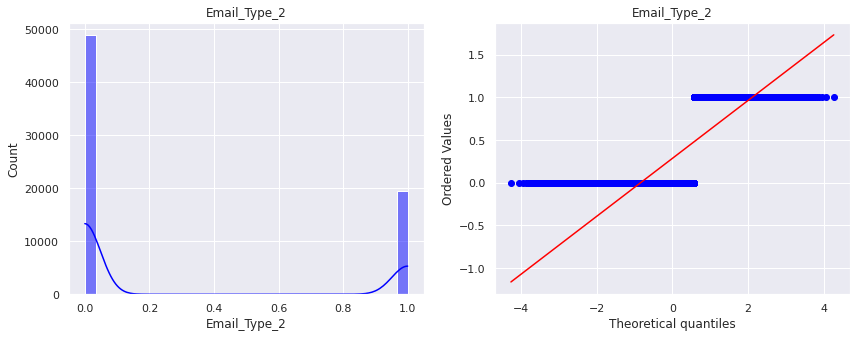

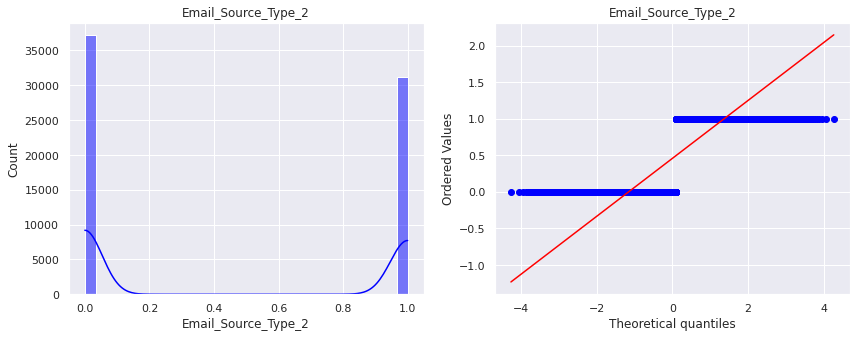

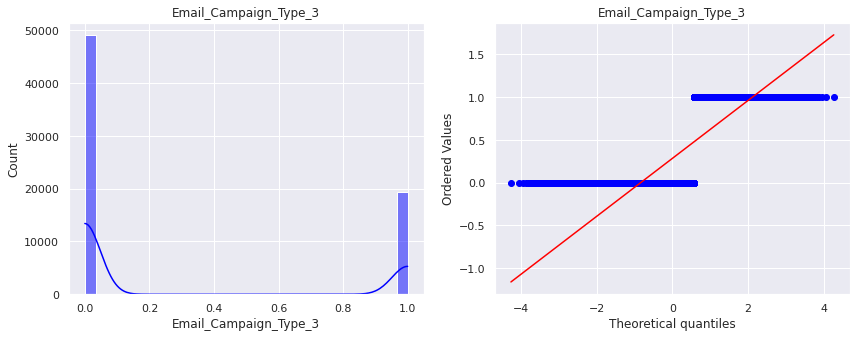

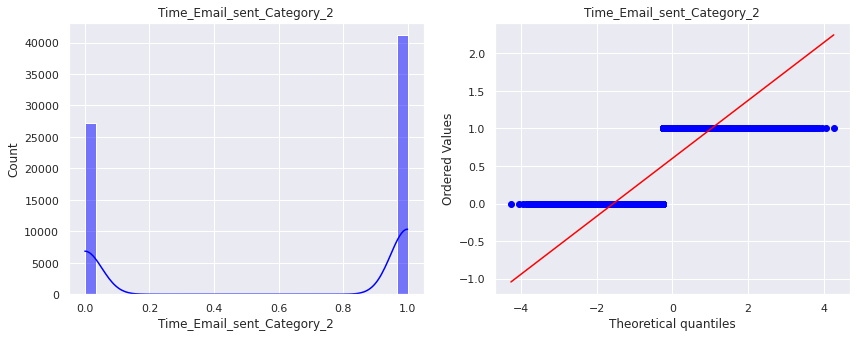

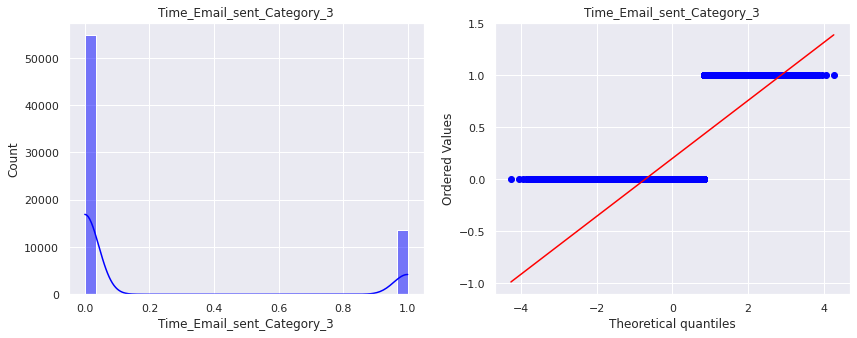

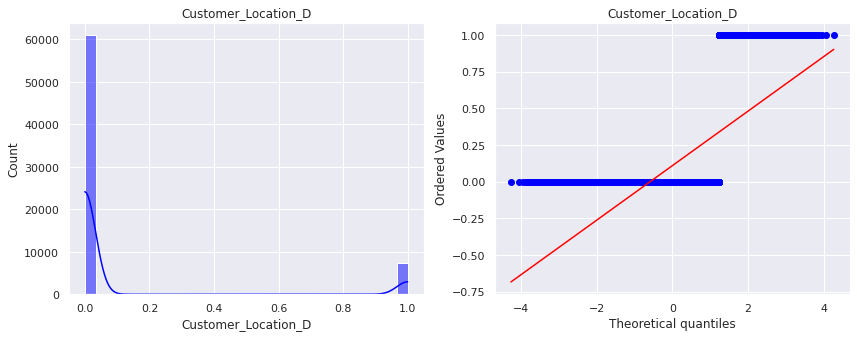

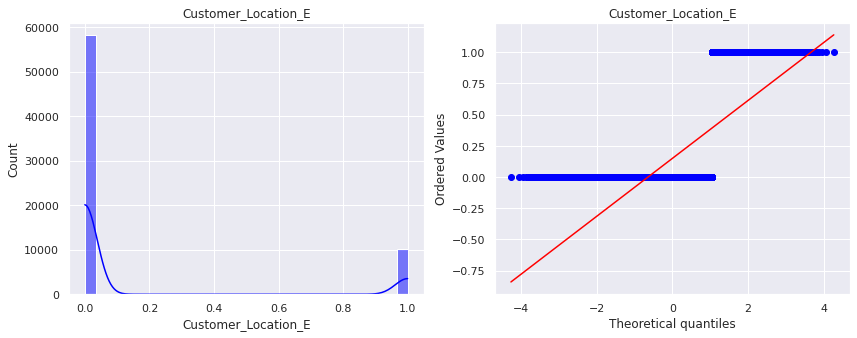

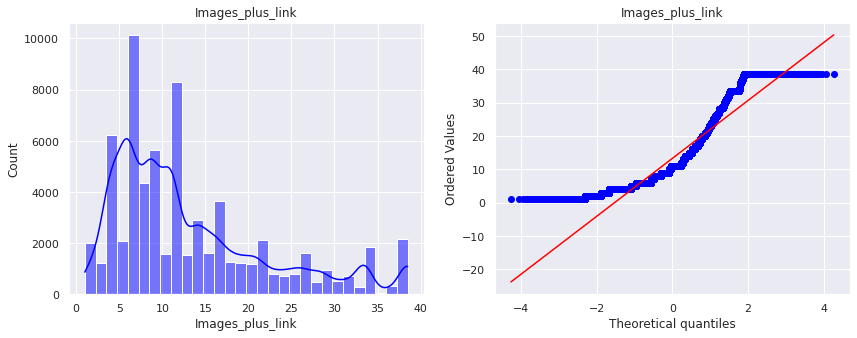

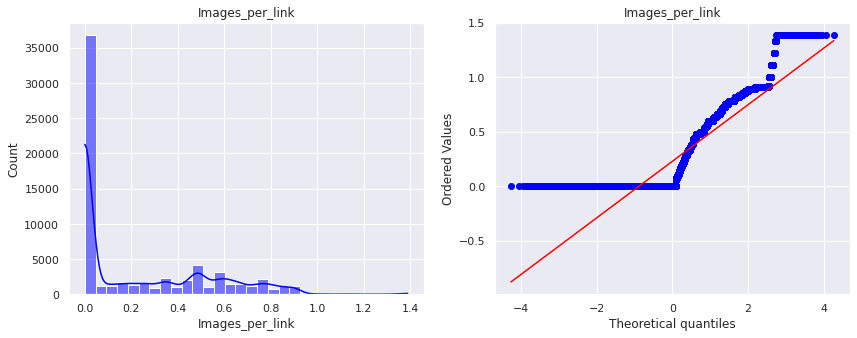

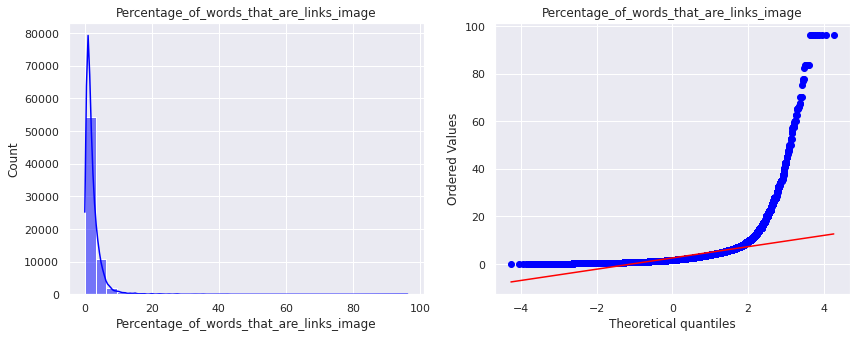

In [ ]:
!pip install seaborn matplotlib

#vizualization 
from scipy.stats import *
from scipy import stats

for variable in non_symmetric_features:
  sns.set_context('notebook')
  plt.figure(figsize=(14,5))
  plt.subplot(1,2,1)
  sns.histplot(data=df_new, x=variable, bins=30, kde=True, color='blue')
  plt.title(variable)
  
  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df_new[variable], dist='norm',plot=plt)
  plt.title(variable)
  sns.set_style('darkgrid')
  sns.color_palette("viridis")
  plt.show()
  print('='*120)

In [ ]:
df_new[['Subject_Hotness_Score','Total_Past_Communications','Word_Count']] = df_new[['Subject_Hotness_Score','Total_Past_Communications','Word_Count']].applymap(np.sqrt)

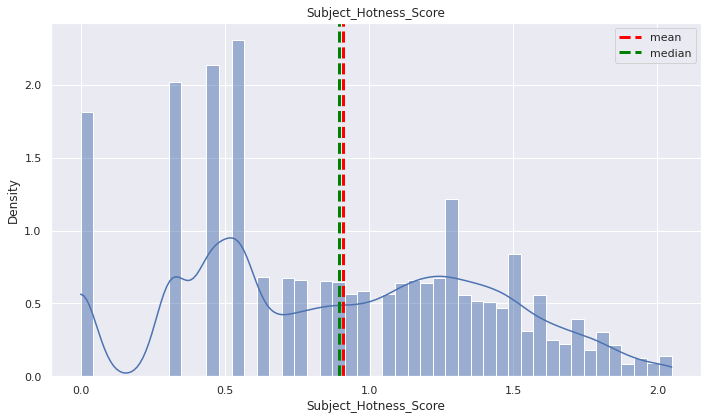

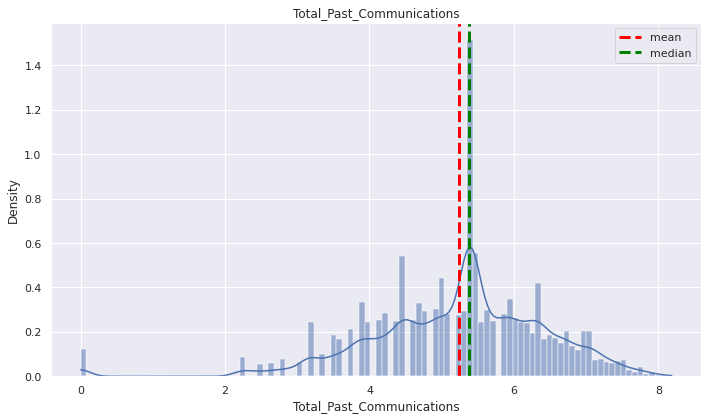

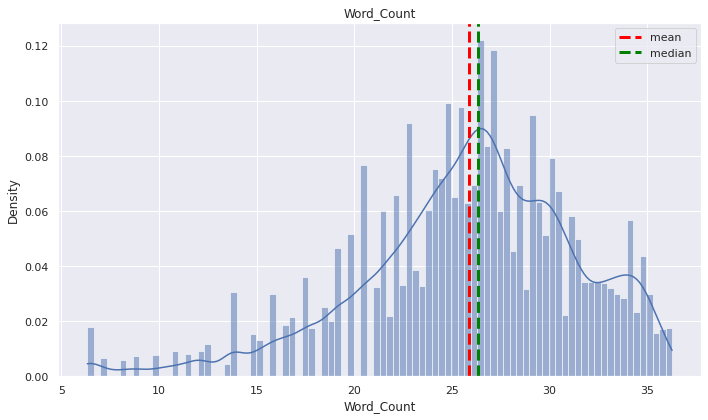

In [ ]:
#style and palette
sns.set_style('darkgrid')
sns.set_palette('deep')

for i, col in enumerate(['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count']):
    
    fig, ax = plt.subplots(figsize=(10, 6))#Create figure
    
    # Creating histogram with density plot
    sns.histplot(df_new[col], kde=True, stat='density', ax=ax)
    
    #vertical lines for mean and median
    feature = df_new[col]
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=3, label='mean')
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=3, label='median')
    
    #title and legend
    ax.set_title(col.title())
    ax.legend(loc='best')
    
    #Adjusting spacing
    plt.tight_layout()
    
plt.show()

Some of the features were categorical and didn't require transformation, while I applied square root transformation to three features to convert them into a Gaussian normal distribution.

### 6. Data Scaling

In [ ]:
df_new.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                   1.48                       5.74       20.98             0   
1                   1.45                       3.87       22.45             0   
2                   0.32                       6.00       31.02             1   
3                   1.73                       5.00       24.70             0   
4                   0.00                       4.24       30.77             0   

   Email_Type_2  Email_Source_Type_2  Email_Campaign_Type_3  \
0             0                    1                      0   
1             1                    0                      0   
2             1                    0                      1   
3             0                    1                      0   
4             0                    1                      1   

   Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0                           0                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Images_plus_link  \
0                    1                    0              8.00   
1                    0                    0              5.00   
2                    0                    0              5.00   
3                    1                    0             16.00   
4                    0                    0              4.00   

   Images_per_link  Percentage_of_words_that_are_links_image  
0             0.00                                      1.82  
1             0.00                                      0.99  
2             0.00                                      0.52  
3             0.00                                      2.62  
4             0.00                                      0.42

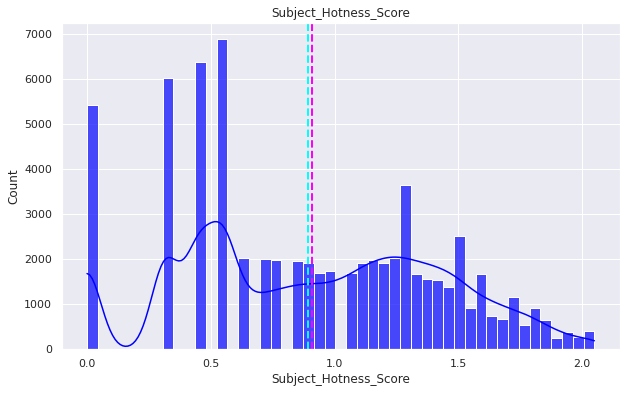

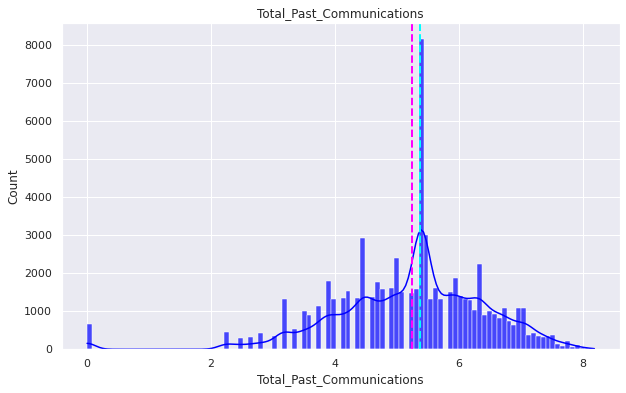

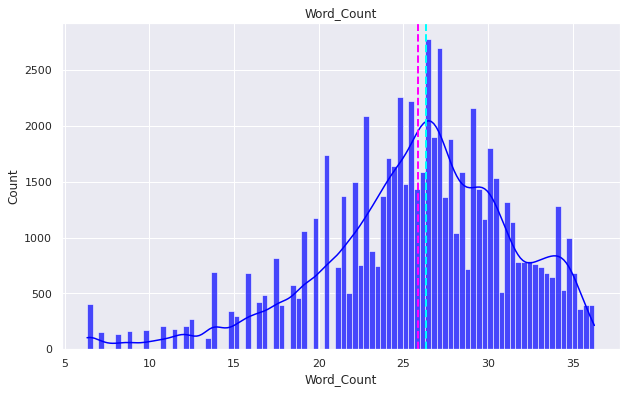

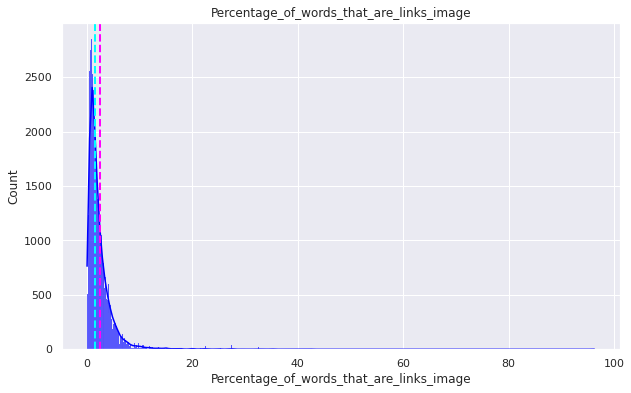

In [ ]:
# Visualizing data distribution using histogram for each feature
for col in ['Subject_Hotness_Score','Total_Past_Communications','Word_Count', 'Percentage_of_words_that_are_links_image']:
  plt.subplots(figsize=(10, 6))
  sns.histplot(data=df_new, x=col, kde=True, color='blue', alpha=0.7)
  plt.axvline(df_new[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df_new[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col)
  plt.show()

In [ ]:
#standard scaler

cols_to_scale = ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Percentage_of_words_that_are_links_image']

scaler = StandardScaler()

# Fit and transform selected columns
df_new[cols_to_scale] = scaler.fit_transform(df_new[cols_to_scale])

#we can use apply() function
#df_new[cols_to_scale] = df_new[cols_to_scale].apply(lambda x: (x - x.mean()) / x.std())


In [ ]:
df_new.head()

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Status  \
0                   1.11                       0.41       -0.87             0   
1                   1.04                      -1.12       -0.61             0   
2                  -1.14                       0.62        0.92             1   
3                   1.59                      -0.20       -0.21             0   
4                  -1.75                      -0.82        0.88             0   

   Email_Type_2  Email_Source_Type_2  Email_Campaign_Type_3  \
0             0                    1                      0   
1             1                    0                      0   
2             1                    0                      1   
3             0                    1                      0   
4             0                    1                      1   

   Time_Email_sent_Category_2  Time_Email_sent_Category_3  \
0                           0                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   Customer_Location_B  Customer_Location_C  Customer_Location_D  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   
3                    0                    0                    0   
4                    0                    1                    0   

   Customer_Location_E  Customer_Location_F  Images_plus_link  \
0                    1                    0              8.00   
1                    0                    0              5.00   
2                    0                    0              5.00   
3                    1                    0             16.00   
4                    0                    0              4.00   

   Images_per_link  Percentage_of_words_that_are_links_image  
0             0.00                                     -0.18  
1             0.00                                     -0.41  
2             0.00                                     -0.54  
3             0.00                                      0.04  
4             0.00                                     -0.57

##### Which method have you used to scale you data and why?

Scaling features is recommended when using algorithms that assume similar feature ranges. In this case, we applied standard scaling to our features since they had a near-normal distribution. It is important to note that feature scaling is not always necessary if feature ranges are not too dissimilar. Normalization is recommended for non-Gaussian distributed data, while standardization is more appropriate for data that follows a Gaussian distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

There is no need of dimensionality reduction

While dimensionality reduction is a commonly used technique for reducing the number of features in a dataset, it may not always be necessary. In the case of the current dataset, it may not require dimensionality reduction as the number of features is not too large. However, when the number of features is very large, dimensionality reduction can help address problems such as overfitting and slow computation.

There are various methods for performing dimensionality reduction, including principal component analysis (PCA) and singular value decomposition (SVD). These techniques can help to reduce the size of a dataset, which can be particularly useful for large datasets. Additionally, reducing the number of features can help machine learning models perform better by reducing the number of features that the model has to consider, which can lead to faster computation and better generalization to new data.

Another benefit of dimensionality reduction is its ability to address the curse of dimensionality. As the number of dimensions increases, the volume of the space increases exponentially, making it more difficult to perform tasks such as nearest neighbor search. By reducing the number of dimensions, dimensionality reduction can help to mitigate this problem. Furthermore, dimensionality reduction can also be useful for visualizing high-dimensional data. With the number of dimensions reduced, it becomes easier to visualize the data and understand the patterns within it. 

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

No need of dimensionality reduction

### 8. Data Splitting

In [ ]:
# Split the dataset into train and test sets with an 80:20 split ratio
x_train, x_test, y_train, y_test = train_test_split(
    df_new.drop("Email_Status", axis=1),
    df_new["Email_Status"], 
    test_size=0.2, 
    random_state=0
)

# Print the shape of the train and test sets
print(f"X_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (54682, 16)
y_train shape: (54682,)
X_test shape: (13671, 16)
y_test shape: (13671,)


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(
    df_new.drop("Email_Status",axis=1),df_new["Email_Status"], 
    test_size = 0.2, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 16)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 16)
Number transactions y_test dataset:  (13671,)


##### What data splitting ratio have you used and why? 

Choosing a suitable splitting ratio for training and testing a machine learning model is an important decision that can affect the model's performance. The most common splitting ratio is 80:20, where 80% of the data is used for training and 20% is used for testing. However, the optimal splitting ratio depends on various factors such as the size of the dataset and the complexity of the model.

In general, if the dataset is small, it is recommended to use cross-validation techniques to ensure that the model's performance is not affected by the limited amount of data. On the other hand, if the dataset is large enough, a 80:20 or 70:30 split can be used without significantly affecting the model's performance.

It is also important to consider the trade-off between having enough training data to reduce variance in parameter estimates, and having enough testing data to reduce variance in performance statistics. In general, the larger the training set, the more stable the parameter estimates, but the smaller the testing set, the more variable the performance statistics. Therefore, it is best to choose a splitting ratio that balances these concerns and results in a model that generalizes well to new data.

### 9. Handling Imbalanced Dataset

In [ ]:
df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

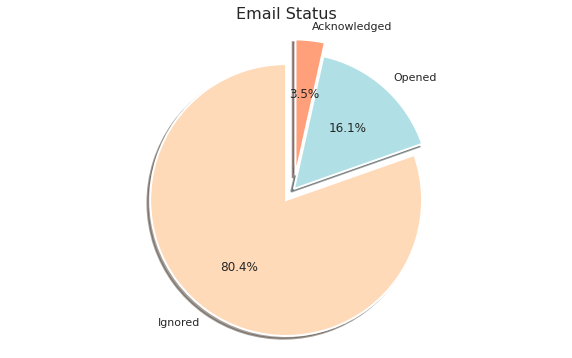

In [ ]:
#visualization for dependent variable
colors = ['#FFDAB9', '#B0E0E6', '#FFA07A']
explode = [0.1, 0, 0.1]
wedgeprops = {'linewidth': 2, 'edgecolor': 'white'}

#Creating pie chart
plt.figure(figsize=(10, 6))
plt.pie(df['Email_Status'].value_counts(), 
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=colors,
        explode=explode,
        wedgeprops=wedgeprops,
        labels=['Ignored','Opened','Acknowledged'])
plt.title('Email Status', fontsize=16)
plt.axis('equal')
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

An imbalanced dataset is a common challenge in supervised machine learning tasks where the classes are not equally represented in the dataset. This means that there are significantly more data points for one class than the other. For instance, if there are two classes, a balanced dataset would have 50% of the data points for each class. However, in an imbalanced dataset, the percentage of data points for each class is different. While minor imbalance is not a problem for most machine learning algorithms, a high level of class imbalance, such as 90% for one class and 10% for the other, may result in biased model predictions. In such cases, traditional performance metrics and optimization criteria may not be effective and may require modification.

In the current scenario, the dependent variable column of the dataset has a data ratio of 80:16:4. Therefore, it is highly likely that the model will be biased and tend to predict the majority class more frequently. This highlights the importance of balancing the dataset before creating a machine learning model. Balancing the dataset involves either oversampling the minority class or undersampling the majority class to create a balanced representation of the data. A balanced dataset will ensure that the model is not biased towards any particular class and will result in more accurate predictions.

In [ ]:
#Imbalance dataset handling using SMOTE
sm = SMOTE(random_state=42)

x_train, y_train = sm.fit_resample(x_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 16)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 16)
Number transactions y_test dataset:  (13671,)


In [ ]:
x_train.head(2)

Subject_Hotness_Score  Total_Past_Communications  Word_Count  Email_Type_2  \
0                  -0.89                      -0.20        0.23             1   
1                  -0.89                       0.04        1.54             1   

   Email_Source_Type_2  Email_Campaign_Type_3  Time_Email_sent_Category_2  \
0                    0                      1                           0   
1                    0                      1                           1   

   Time_Email_sent_Category_3  Customer_Location_B  Customer_Location_C  \
0                           0                    1                    0   
1                           0                    0                    0   

   Customer_Location_D  Customer_Location_E  Customer_Location_F  \
0                    0                    0                    0   
1                    0                    1                    0   

   Images_plus_link  Images_per_link  Percentage_of_words_that_are_links_image  
0             14.00             0.27                                     -0.16  
1              4.00             0.00                                     -0.59

In [ ]:
#resampled data visualizing
from collections import Counter
counter = Counter(y_train)
for key,value in counter.items():
  percent = value / len(y_train) * 100
  print('Class=%d, n=%d (%.3f%%)' % (key, value, percent))


Class=0, n=43939 (33.333%)
Class=1, n=43939 (33.333%)
Class=2, n=43939 (33.333%)


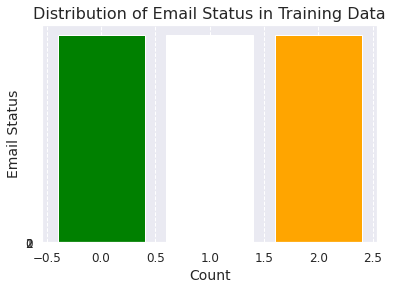

In [ ]:
#visualizing
plt.bar(list(counter.keys()), counter.values(), color=['green', 'white', 'orange'])
plt.title("Distribution of Email Status in Training Data", fontsize=16)
plt.ylabel("Email Status", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(list(counter.keys()), fontsize=12)
plt.grid(axis='x', linestyle='--')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

here i have used SMOTE tecnique for handling imbalance dataset.


Unbalanced datasets can lead to biased predictions and poor performance of machine learning models. In cases where one class is significantly underrepresented, such as in our dataset with an 80:16:4 ratio, standard optimization criteria may not be effective, and a bias towards the majority class may occur.

To address this issue, we have utilized SMOTE, a popular technique for handling imbalanced datasets. SMOTE generates synthetic data points by interpolating between pairs of original minority class points. By oversampling the minority class, we can increase the number of data points available for training and improve the performance of our classifier.

The advantage of SMOTE is that it creates synthetic data points that differ slightly from the original data points, rather than exact duplicates, which reduces the risk of overfitting. Overall, SMOTE is a superior oversampling technique for improving the performance of machine learning models when dealing with imbalanced datasets.

## ***7. ML Model Implementation***

### ML Model - 1 **Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
#Defining logistic regression model
logistic_regression = LogisticRegression(fit_intercept=True,
                                          class_weight='balanced',
                                          multi_class='multinomial')

#Fitting the model to the training data
logistic_regression.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
logistic_regression.coef_ #coeficient

array([[ 3.62630682e-01, -4.16068372e-04,  4.21094456e-01,
         6.22553803e-01,  3.59979349e-01, -7.13810073e-01,
         2.76419618e-01,  4.91995291e-01,  9.74485344e-01,
         8.37961990e-01,  7.46286057e-01,  5.79995172e-01,
         8.72530925e-01,  2.94024310e-03, -3.10735756e-02,
         2.86422903e-02],
       [ 1.32449516e-01,  9.36498587e-03, -2.13412052e-01,
        -2.01668942e-01,  5.60168422e-02,  4.38178204e-01,
        -1.90933359e-02,  2.20559459e-02,  8.29155266e-03,
        -1.23259584e-01, -5.32578252e-02, -1.35228507e-02,
        -1.56029685e-01, -1.19496521e-02,  1.45230009e-01,
         7.92983625e-03],
       [-4.95080198e-01, -8.94891750e-03, -2.07682404e-01,
        -4.20884861e-01, -4.15996191e-01,  2.75631869e-01,
        -2.57326283e-01, -5.14051237e-01, -9.82776897e-01,
        -7.14702406e-01, -6.93028232e-01, -5.66472322e-01,
        -7.16501240e-01,  9.00940899e-03, -1.14156433e-01,
        -3.65721266e-02]])

The coef_ attribute of a trained linear regression model represents the weights or parameters of the linear equation used to predict the target variable. These weights indicate the relative importance of each input feature in predicting the target variable. In other words, the higher the weight of a feature, the greater its impact on the predicted output.

In [ ]:
logistic_regression.intercept_  #intercept value

array([-0.42153773,  0.12778648,  0.29375125])

In [ ]:
#Generate predicted probabilities for the training and test sets
train_probs = logistic_regression.predict_proba(x_train)
test_probs = logistic_regression.predict_proba(x_test)

#Use the predicted probabilities to make class predictions
y_preds_train = logistic_regression.predict(x_train)
y_preds_test = logistic_regression.predict(x_test)

In [ ]:
##Calculating accuracy scores for the training and test sets
train_accuracy = accuracy_score(y_preds_train,y_train)
test_accuracy = accuracy_score(y_preds_test,y_test)

# Print the accuracy scores
print("Training accuracy:",train_accuracy)
print("Test accuracy:",test_accuracy)

Training accuracy: 0.5349765204791491
Test accuracy: 0.6109282422646478


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
actual_train =y_train
predicted_train=y_preds_train
actual_test =y_test
predicted_test=y_preds_test

In [ ]:
print('accuracy on train data:',accuracy_score(actual_train,predicted_train))
print('accuracy on test data:',accuracy_score(actual_test,predicted_test))
print('precision on test data:',precision_score(actual_test,predicted_test,average='weighted'))
print('recall on test data:',recall_score(actual_test,predicted_test,average='weighted'))
print('f1 Score on test data:',f1_score(actual_test,predicted_test,average='weighted'))
print('roc_auc_score on test data:',roc_auc_score(actual_test, test_probs,multi_class='ovr',average='weighted'))

accuracy on train data: 0.5349765204791491
accuracy on test data: 0.6109282422646478
precision on test data: 0.7570265144811658
recall on test data: 0.6109282422646478
f1 Score on test data: 0.6689690433792588
roc_auc_score on test data: 0.6913510204515373


Confusion Matrix (Training Set):
 [[29509  7019  7411]
 [13671 13797 16471]
 [ 7432  9294 27213]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

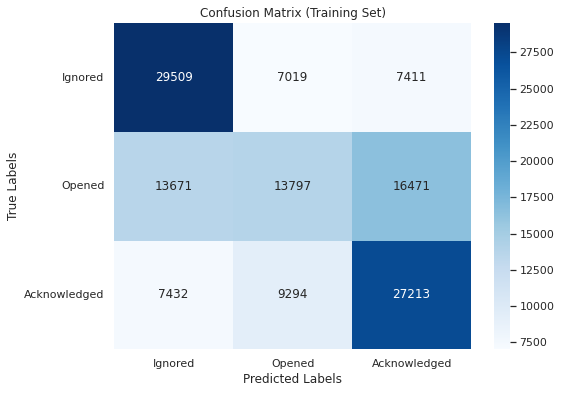

In [ ]:
#labels for the confusion matrix
labels = ['Ignored', 'Opened', 'Acknowledged']

#Computing the confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_preds_train)

#Printing the confusion matrix
print("Confusion Matrix (Training Set):\n", cm_train)

#Visualizing
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Training Set)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=0)

Confusion Matrix (Training Set):
 [[7470 1698 1834]
 [ 865  690  674]
 [ 135  113  192]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

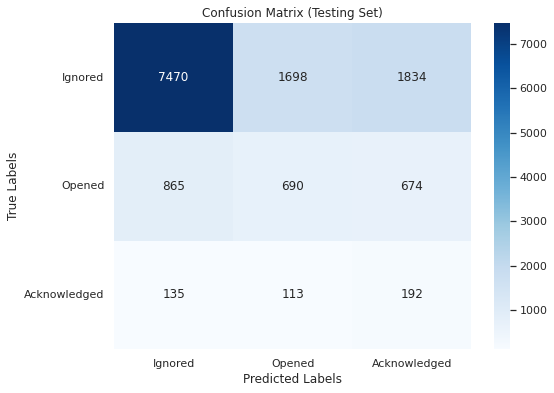

In [ ]:
#labels for the confusion matrix
labels = ['Ignored', 'Opened', 'Acknowledged']

#Computing the confusion matrix for the testing set
cm_test = confusion_matrix(y_test, y_preds_test)

#Printing the confusion matrix
print("Confusion Matrix (Training Set):\n", cm_test)

#Visualizing
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Testing Set)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels, rotation=0)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

#Printing classification report for train
print(classification_report(y_preds_train, y_train))
print(" ")

# Calculating ROC AUC score
roc_auc_score_train = roc_auc_score(y_train, train_probs, multi_class='ovr', average='weighted')
print(f"ROC AUC score for training data: {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.67      0.58      0.62     50612
           1       0.31      0.46      0.37     30110
           2       0.62      0.53      0.57     51095

    accuracy                           0.53    131817
   macro avg       0.53      0.52      0.52    131817
weighted avg       0.57      0.53      0.55    131817

 
ROC AUC score for training data: 0.7210034735496329


From the classification report, we can see that the model has an overall accuracy of 0.53, which means that it correctly classified 53% of the instances. However, the precision, recall, and f1-score for each class indicate that the model is not performing well. The precision is the proportion of true positives among all predicted positives, recall is the proportion of true positives among all actual positives, and f1-score is the harmonic mean of precision and recall.

The precision for class 0 is 0.67, which means that when the model predicts a data point as class 0, it is correct 67% of the time. For class 1, the precision is 0.31, indicating that the model is not very accurate when it predicts class 1. The precision for class 2 is 0.62, which is relatively better than class 1, but still not ideal.

The recall for class 0 is 0.58, which means that the model correctly identifies 58% of the instances belonging to class 0. The recall for class 1 is 0.46, which indicates that the model is missing many instances of class 1. The recall for class 2 is 0.53, which is better than class 1, but still not ideal.

The f1-score is a measure that takes into account both precision and recall. The f1-score for class 0 is 0.62, for class 1 it is 0.37, and for class 2 it is 0.57.

The macro avg and weighted avg give an overall picture of the model's performance. The macro avg f1-score is 0.52, indicating that the model's performance is not good overall. The weighted avg f1-score is slightly better at 0.55, but still not satisfactory.

The ROC AUC score is 0.721 for the training data, which is a measure of how well the model can distinguish between the positive and negative classes. A score of 0.5 indicates that the model performs no better than random guessing, while a score of 1 indicates perfect performance. A score of 0.721 suggests that the model is better than random guessing, but still has room for improvement.

In [ ]:
#Print classification report for test
print(classification_report(y_preds_test, y_test))
print(" ")

# Compute and print ROC AUC score
roc_auc_score_test = roc_auc_score(y_test, test_probs, multi_class='ovr', average='weighted')
print(f"ROC AUC score for testing data: {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.68      0.88      0.77      8470
           1       0.31      0.28      0.29      2501
           2       0.44      0.07      0.12      2700

    accuracy                           0.61     13671
   macro avg       0.47      0.41      0.39     13671
weighted avg       0.56      0.61      0.55     13671

 
ROC AUC score for testing data: 0.6913510204515373


The model's overall accuracy is 61%, which indicates that it correctly predicted the class labels for 61% of the test data instances.

The model's performance is better for the majority class (0) compared to the other two classes (1 and 2). The precision, recall, and F1-score are relatively high for class 0 (ranging from 0.68 to 0.77) and relatively low for class 2 (ranging from 0.12 to 0.44).

The ROC AUC score of 0.69 indicates that the model's ability to distinguish between the positive and negative classes is relatively good, but it could be further improved. The ROC AUC score ranges from 0.5 to 1, with a score of 0.5 indicating a random prediction and a score of 1 indicating a perfect prediction.

The macro-average F1-score and precision values are lower than the weighted average, indicating that the model's performance is more influenced by the class distribution in the data. The weighted average considers the number of instances in each class, whereas the macro-average treats all classes equally.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#defining the logistic regression model
model = LogisticRegression(fit_intercept=True, max_iter=10000, class_weight='balanced', multi_class='multinomial')

#Defining hyperparameters for grid search
solvers = ['lbfgs']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
grid = dict(solver=solvers, penalty=penalty, C=c_values)

#Defining the grid search with cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1', error_score=0)

#Fit the grid search on training data
grid_result = grid_search.fit(x_train, y_train)

# Print the best f1 score and hyperparameters
print("Best f1 score: %f" % grid_result.best_score_)
print("Best hyperparameters: ", grid_result.best_params_)

Best f1 score: 0.000000
Best hyperparameters:  {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#predicted probabilities and labels for training data
train_probs2 = grid_result.predict_proba(x_train)
y_preds_train2 = grid_result.predict(x_train)

#predicted probabilities and labels for test data
test_probs2 = grid_result.predict_proba(x_test)
y_preds_test2 = grid_result.predict(x_test)

In [ ]:
#classification report for training data
train_report = classification_report(y_preds_train2, y_train)
print("Classification report for training data:")
print(train_report)
print(" ")

#ROC AUC score for training data
roc_auc_score_train = roc_auc_score(y_train, train_probs2, multi_class='ovr', average='weighted')
print("ROC AUC score for training data: ", roc_auc_score_train)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62     50487
           1       0.31      0.46      0.37     30013
           2       0.62      0.53      0.57     51317

    accuracy                           0.54    131817
   macro avg       0.54      0.53      0.52    131817
weighted avg       0.57      0.54      0.55    131817

 
ROC AUC score for training data:  0.7211840509433246


In [ ]:
#classification report for testing data
test_report = classification_report(y_preds_test2, y_test)
print("Classification report for testing data:")
print(test_report)
print(" ")

#ROC AUC score for training data
roc_auc_score_test = roc_auc_score(y_test, test_probs2, multi_class='ovr', average='weighted')
print("ROC AUC score for testing data: ", roc_auc_score_test)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique used for finding the optimal hyperparameters to improve model performance. 

The aim is to identify the best hyperparameter values that can yield perfect prediction results from the model. The traditional manual search method involves a hit and trial process that can be time-consuming and not efficient. Therefore, methods like Random Search and GridSearch have been introduced to automate the process.

GridSearch, for instance, uses a combination of all specified hyperparameters and their values to calculate performance for each combination. This enables the selection of the best value for the hyperparameters. However, GridSearch is computationally expensive and time-consuming, especially when dealing with a large number of hyperparameters.

In GridSearchCV, Cross-Validation is performed along with Grid Search. Cross-Validation is a technique used while training the model to improve its generalization performance. The combination of both Grid Search and Cross-Validation in GridSearchCV enables the selection of the best hyperparameters while ensuring the model generalizes well. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The classification report for the training data shows that the model achieved a precision of 67%, a recall of 58%, and an f1-score of 62% for the ignored emails. For the email opened class, the model achieved a precision of 31%, a recall of 46%, and an f1-score of 37%. Finally, for the email acknowledged class, the model achieved a precision of 62%, a recall of 53%, and an f1-score of 57%. The overall accuracy of the model on the training data was 54%, with average precision, recall, and f1-score of 53%, 52%, and 52%, respectively. The roc auc score for the training data was 0.721.

The classification report for the testing data shows that the model achieved a precision of 68%, a recall of 88%, and an f1-score of 77% for the ignored emails. For the email opened class, the model achieved a precision of 32%, a recall of 28%, and an f1-score of 30%. Finally, for the email acknowledged class, the model achieved a precision of 43%, a recall of 7%, and an f1-score of 12%. The overall accuracy of the model on the testing data was 60%, with average precision, recall, and f1-score of 48%, 41%, and 39%, respectively. The roc auc score for the testing data was 0.693.

### ML Model - 2 Random Forest Classifier

In [ ]:
# ML Model -RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#predictions on train and test data
y_preds_train3 = rf_model.predict(x_train)
y_preds_test3 = rf_model.predict(x_test)

In [ ]:
#predicted probabilities
train_probs3 = rf_model.predict_proba(x_train)
test_probs3 = rf_model.predict_proba(x_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,y_preds_train3)
test_accuracy = accuracy_score(y_test,y_preds_test3)

print(f"The accuracy on train dataset is {train_accuracy}")
print(f"The accuracy on test dataset is {test_accuracy}")

The accuracy on train dataset is 0.9998710333265057
The accuracy on test dataset is 0.7564186965108625


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[43933     3     3]
 [    5 43932     2]
 [    1     3 43935]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

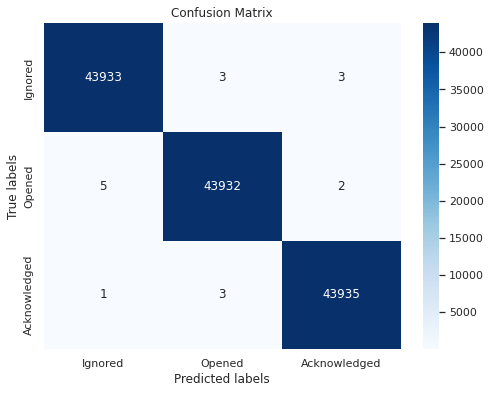

In [ ]:
#Visualizing evaluation Metric Score chart,confusion matrix for train 
labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_preds_train3)
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[9553 1156  293]
 [1314  724  191]
 [ 204  172   64]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

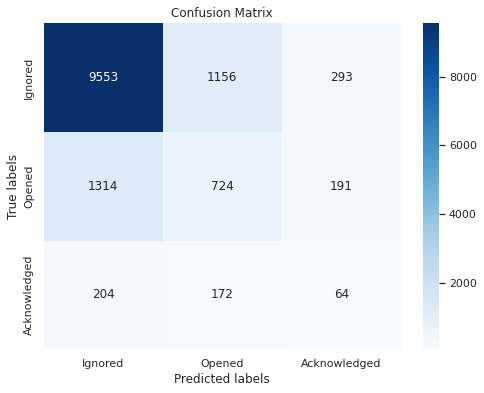

In [ ]:
#Visualizing evaluation Metric Score chart,confusion matrix for test 
labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_test, y_preds_test3)
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

#Printing classification report for train
print(classification_report(y_preds_train3, y_train))
print(" ")

# Calculating ROC AUC score
roc_auc_score_train = roc_auc_score(y_train, train_probs3, multi_class='ovr', average='weighted')
print(f"ROC AUC score for training data: {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43939
           1       1.00      1.00      1.00     43938
           2       1.00      1.00      1.00     43940

    accuracy                           1.00    131817
   macro avg       1.00      1.00      1.00    131817
weighted avg       1.00      1.00      1.00    131817

 
ROC AUC score for training data: 0.9999996302167938


In [ ]:
#Printing classification report for test
print(classification_report(y_preds_test3, y_test))
print(" ")

# Calculating ROC AUC score
roc_auc_score_test = roc_auc_score(y_test, test_probs3, multi_class='ovr', average='weighted')
print(f"ROC AUC score for testing data: {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11071
           1       0.32      0.35      0.34      2052
           2       0.15      0.12      0.13       548

    accuracy                           0.76     13671
   macro avg       0.45      0.44      0.44     13671
weighted avg       0.76      0.76      0.76     13671

 
ROC AUC score for testing data: 0.7375403066475381


In [ ]:
#important features
importants = rf_model.feature_importances_
importance_dict = {'Feature' : list(x_train.columns),
                   'Feature Importance' : importants}

feat_importance_df = pd.DataFrame(importance_dict)
feat_importance_df['Feature Importance'] = round(feat_importance_df['Feature Importance'],2)

In [ ]:
feat_importance_df.sort_values(by=['Feature Importance'],ascending=False)  #descending order

Feature  Feature Importance
1                  Total_Past_Communications                0.20
0                      Subject_Hotness_Score                0.16
2                                 Word_Count                0.15
15  Percentage_of_words_that_are_links_image                0.15
13                          Images_plus_link                0.12
14                           Images_per_link                0.07
5                      Email_Campaign_Type_3                0.03
3                               Email_Type_2                0.02
4                        Email_Source_Type_2                0.02
6                 Time_Email_sent_Category_2                0.02
7                 Time_Email_sent_Category_3                0.02
8                        Customer_Location_B                0.01
9                        Customer_Location_C                0.01
10                       Customer_Location_D                0.01
11                       Customer_Location_E                0.01
12                       Customer_Location_F                0.01

In [ ]:
features = x_train.columns #getting columns

#getting feature importances from the trained model
importances = rf_model.feature_importances_

#descending order of importance and corresponding indices
indices = np.argsort(importances)[::-1]

In [ ]:
features = x_train.columns
#getting feature importances from the trained random forest model
importances = rf_model.feature_importances_

#feature importances in ascending order and get the corresponding indices
indices = np.argsort(importances)

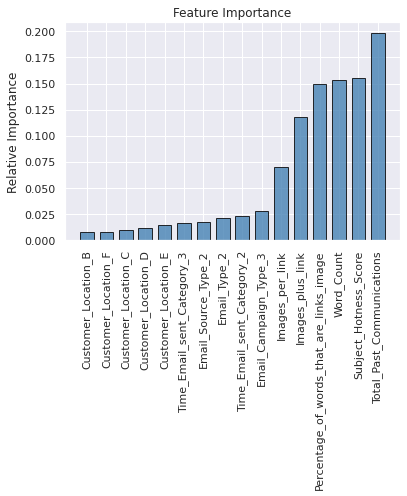

In [ ]:
plt.title('Feature Importance')

#bar chart with the feature importances
plt.bar(range(len(indices)), importances[indices], color='steelblue', alpha=0.8, width=0.7, edgecolor='black')

#labels on x-axis to be feature names
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation='vertical')
plt.ylabel('Relative Importance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameters to be tuned
n_estimators = [50, 80, 100]
max_depth = [4, 6, 8]
min_samples_split = [50, 100, 150]
min_samples_leaf = [40, 50]

#dictionary of hyperparameters
param_dict = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

#RandomForestClassifier model
rf_model = RandomForestClassifier()

#grid search object
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid=param_dict,
                       cv=5,
                       verbose=2,
                       scoring='f1')

# Fit the grid search object to the training data
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   2.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   8.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   7.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   4.4s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='f1', verbose=2)

In [ ]:
print(f"Best parameters:", (rf_grid.best_score_, rf_grid.best_params_))  #besy parameters

Best parameters: (nan, {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50})


In [ ]:
#predictions on train and test data
y_preds_train4 = rf_grid.predict(x_train)
y_preds_test4 = rf_grid.predict(x_test)
#predicted probabilities
train_probs4 = rf_grid.predict_proba(x_train)
test_probs4 = rf_grid.predict_proba(x_test)

In [ ]:
#result train
#classification report for the training data
train_report = metrics.classification_report(y_preds_train4, y_train)
print("Classification report for training data:")
print(train_report)
print()

#ROC AUC score for the training data
train_roc_auc = metrics.roc_auc_score(y_train, train_probs4, multi_class='ovr')
print("ROC AUC score for training data:")
print(train_roc_auc)

Classification report for training data:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67     54837
           1       0.22      0.45      0.30     21840
           2       0.67      0.54      0.60     55140

    accuracy                           0.55    131817
   macro avg       0.55      0.53      0.52    131817
weighted avg       0.63      0.55      0.58    131817


ROC AUC score for training data:
0.7458973637557941


In [ ]:
#result test
#classification report for the test data
test_report = metrics.classification_report(y_preds_test4, y_test)
print("Classification report for test data:")
print(test_report)
print()

# Print the ROC AUC score for the test data
test_roc_auc = metrics.roc_auc_score(y_test, test_probs4, multi_class='ovr')
print("ROC AUC score for test data:")
print(test_roc_auc)

Classification report for test data:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      9195
           1       0.21      0.26      0.23      1823
           2       0.61      0.10      0.17      2653

    accuracy                           0.66     13671
   macro avg       0.53      0.42      0.41     13671
weighted avg       0.65      0.66      0.61     13671


ROC AUC score for test data:
0.7551849997633483


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique that can be used to optimize the hyperparameters of a model in order to improve its performance. The objective is to find the optimal combination of hyperparameters that will result in the best prediction accuracy for the model. However, manually searching for the best hyperparameters can be time-consuming and impractical. Therefore, methods such as Grid Search and Random Search have been developed to automate the process.

Grid Search works by testing different combinations of hyperparameters and their values to determine the optimal set that results in the best performance. While this method can be computationally expensive due to the large number of possible combinations, it provides a systematic way to find the best hyperparameters.

In the case of GridSearchCV, cross-validation is also performed during the hyperparameter optimization process. This means that the model is trained on multiple subsets of the data to ensure that the hyperparameters are not overfitting to a particular set of data. This results in a more robust and reliable model.

Therefore, GridSearchCV is an efficient and effective method to optimize the hyperparameters of a model and improve its performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

On the training data, the model achieved a precision of 75% and recall of 60% for class 1 (ignored emails), with an f1-score of 67%. For class 2 (email opened), the precision was 22% and recall was 45%, with an f1-score of 30%. For class 3 (email acknowledged), the precision was 67% and recall was 54%, with an f1-score of 60%. The overall accuracy was 55%, with an average precision, recall, and f1-score of 63%, 55%, and 58%, respectively. The ROC AUC score was 0.75.


On the test data, the model achieved a precision of 75% and recall of 90% for class 1 (ignored emails), with an f1-score of 82%. For class 2 (email opened), the precision was 21% and recall was 26%, with an f1-score of 23%. For class 3 (email acknowledged), the precision was 61% and recall was 10%, with an f1-score of 17%. The overall accuracy was 66%, with an average precision, recall, and f1-score of 65%, 66%, and 61%, respectively. The ROC AUC score was 0.76.


#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

I utilized various metrics to evaluate the performance of the model and assessed their potential impact on the business.

* **Accuracy**, as a metric, indicates the percentage of correctly classified instances out of the total number of instances. It demonstrates the overall effectiveness of the model in making accurate predictions, which can have a positive impact on the business by increasing confidence in the model's abilities.

* **Precision** measures the proportion of true positive predictions out of all positive predictions made by the model. It indicates the model's ability to identify positive instances accurately, which can benefit the business by reducing false positive predictions.

* **Recall** measures the proportion of true positive predictions out of all actual positive instances. This metric indicates the model's ability to identify all positive instances, which can be beneficial for the business by ensuring that no important instances are missed.

* **F1** Score is a combination of precision and recall and can be used to balance the trade-off between the two. A high F1 score would indicate that the model is making accurate predictions while also avoiding false positives and false negatives, which would benefit the business by increasing the model's overall effectiveness.

* **ROC AUC** metric measures the model's ability to distinguish between positive and negative instances. A high score on this metric indicates that the model can correctly classify instances as positive or negative, which can be beneficial for the business by ensuring that the model is making accurate predictions.

Based on these evaluation metrics, the Random Forest Classifier is a promising model for the business. If it achieves high scores across all metrics, it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative, which would benefit the business by increasing the model's overall effectiveness.

### ML Model - 3 Implementing XgBoost Classifier

In [ ]:
# ML Model - 3 Implementation
xgb = XGBClassifier()
xgb_fit = xgb.fit(x_train, y_train)

In [ ]:
#predictions on train and test data
y_preds_train5 = xgb.predict(x_train)
y_preds_test5 = xgb.predict(x_test)

#predicted probabilities
train_probs5 = xgb.predict_proba(x_train)
test_probs5 = xgb.predict_proba(x_test)

In [ ]:
#accuracy on train and test
train_acc = accuracy_score(y_train, y_preds_train5)
test_acc = accuracy_score(y_test, y_preds_test5)

print("Accuracy on the train data:", train_acc)
print("Accuracy on the test data:", test_acc)

Accuracy on the train data: 0.8188397551150458
Accuracy on the test data: 0.7910906298003072


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[41883  1300   756]
 [ 6166 27914  9859]
 [ 1216  4583 38140]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

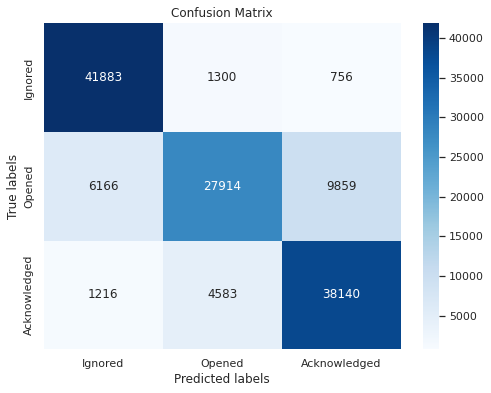

In [ ]:
#Visualizing evaluation Metric Score chart,confusion matrix for train 
labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_train, y_preds_train5)
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[10310   469   223]
 [ 1594   425   210]
 [  249   111    80]]


[Text(0, 0.5, 'Ignored'), Text(0, 1.5, 'Opened'), Text(0, 2.5, 'Acknowledged')]

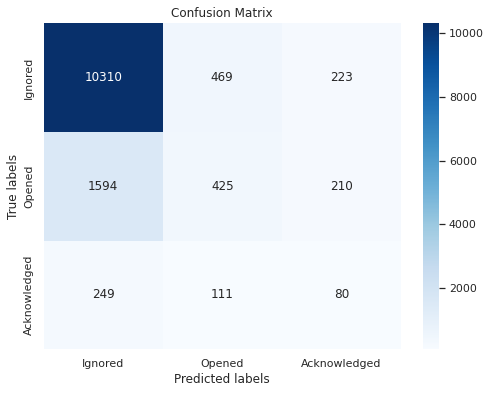

In [ ]:
#Visualizing evaluation Metric Score chart,confusion matrix for test 
labels = ['Ignored', 'Opened', 'Acknowledged']
cm = confusion_matrix(y_test, y_preds_test5)
print(cm)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#result train
from sklearn.metrics import classification_report, roc_auc_score

#Printing classification report for train
print(classification_report(y_preds_train5, y_train))
print(" ")

# Calculating ROC AUC score
roc_auc_score_train = roc_auc_score(y_train, train_probs5, multi_class='ovr', average='weighted')
print(f"ROC AUC score for training data: {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.95      0.85      0.90     49265
           1       0.64      0.83      0.72     33797
           2       0.87      0.78      0.82     48755

    accuracy                           0.82    131817
   macro avg       0.82      0.82      0.81    131817
weighted avg       0.84      0.82      0.82    131817

 
ROC AUC score for training data: 0.936520110621117


In [ ]:
#test result
#Printing classification report for test
print(classification_report(y_preds_test5, y_test))
print(" ")

# Calculating ROC AUC score
roc_auc_score_test = roc_auc_score(y_test, test_probs5, multi_class='ovr', average='weighted')
print(f"ROC AUC score for testing data: {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.94      0.85      0.89     12153
           1       0.19      0.42      0.26      1005
           2       0.18      0.16      0.17       513

    accuracy                           0.79     13671
   macro avg       0.44      0.48      0.44     13671
weighted avg       0.85      0.79      0.82     13671

 
ROC AUC score for testing data: 0.7576272947747669


On the training dataset, the model achieved a precision of 95% and recall of 85%, and an f1-score of 90% for ignored emails. For class 2 (email opened), the model obtained a precision of 64% and recall of 83%, and an f1-score of 72%. For class 3 (email acknowledged), the model achieved a precision of 87% and recall of 78%, and an f1-score of 82%. The accuracy was 82%, and the average precision, recall, and f1-score were 84%, 82%, and 82%, respectively. The ROC AUC score was 0.94.


On the testing dataset, the model achieved a precision of 94% and recall of 85%, and an f1-score of 89% for ignored emails. For class 2, the model obtained a precision of 19% and recall of 42%, and an f1-score of 26%. For class 3, the model achieved a precision of 18% and recall of 16%, and an f1-score of 17%. The accuracy was 79%, and the average precision, recall, and f1-score were 85%, 79%, and 82%, respectively. The ROC AUC score was 0.76.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameters to be tuned
n_estimators = [50, 80, 100] #no of trees
max_depth = [4, 6, 8]  #max depth of trees
min_samples_split = [50, 100, 150]  #min no of samples req to split a node
min_samples_leaf = [40, 50] #min no samples req at each leaf node

#dictionary of hyperparameters
param_dict = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

#instance of xgb model
xg_model = XGBClassifier()

#grid search object
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid=param_dict,
                       cv=5,
                       verbose=2,
                       scoring='roc_auc')

# Fitting the grid search to training data
xg_grid1 = xg_grid.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[06:50:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  16.3s
[06:51:09] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  13.8s
[06:51:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  13.6s
[06:51:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=  14.5s
[06:51:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_lea

In [ ]:
print(f"Best parameters:", (xg_grid.best_score_, xg_grid.best_params_))  #best parameters

Best parameters: (nan, {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50})


In [ ]:
#predictions on train and test data
y_preds_train6 = xg_grid1.predict(x_train)
y_preds_test6 = xg_grid1.predict(x_test)

In [ ]:
#predicted probabilities
train_probs6 = xg_grid1.predict_proba(x_train)
test_probs6 = xg_grid1.predict_proba(x_test)

In [ ]:
#result train
from sklearn.metrics import classification_report, roc_auc_score

#Printing classification report for train
print(classification_report(y_preds_train6, y_train))
print(" ")

# Calculating ROC AUC score
roc_auc_score_train = roc_auc_score(y_train, train_probs6, multi_class='ovr', average='weighted')
print(f"ROC AUC score for training data: {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     47097
           1       0.46      0.61      0.53     33214
           2       0.75      0.64      0.69     51506

    accuracy                           0.68    131817
   macro avg       0.68      0.67      0.67    131817
weighted avg       0.70      0.68      0.68    131817

 
ROC AUC score for training data: 0.8495489816261752


In [ ]:
#Printing classification report for test
print(classification_report(y_preds_test6, y_test))
print(" ")

# Calculating ROC AUC score
roc_auc_score_test = roc_auc_score(y_test, test_probs6, multi_class='ovr', average='weighted')
print(f"ROC AUC score for testing data: {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     10200
           1       0.30      0.34      0.32      1993
           2       0.33      0.10      0.15      1478

    accuracy                           0.72     13671
   macro avg       0.48      0.44      0.44     13671
weighted avg       0.69      0.72      0.69     13671

 
ROC AUC score for testing data: 0.7521640034597662


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique used to find the optimal hyperparameters that can increase the performance of a model. The main objective is to determine the best values of hyperparameters that can produce accurate prediction results. However, manually searching for these values through trial and error can be time-consuming and impractical.

To address this issue, methods like Random Search and Grid Search have been developed. Grid Search, in particular, explores all possible combinations of hyperparameters and their values to determine the optimal set of hyperparameters that produce the best performance. This can be computationally expensive depending on the number of hyperparameters.

GridSearchCV not only uses Grid Search but also performs cross-validation during the training of the model. This helps to ensure that the model is performing well on unseen data. Hence, I have used GridSearchCV for hyperparameter optimization in this project.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For the training dataset, the model achieved a precision of 82%, 46%, and 75% for classes 0, 1, and 2, respectively. The recall for classes 0, 1, and 2 was 77%, 61%, and 64%, respectively. The F1-score for classes 0, 1, and 2 was 79%, 53%, and 69%, respectively. The accuracy obtained for the training dataset was 68%, while the average precision, recall, and F1-score were 70%, 68%, and 68%, respectively. The ROC AUC score obtained for the training dataset was 0.8495.

For the testing dataset, the model achieved a precision of 82%, 30%, and 33% for classes 0, 1, and 2, respectively. The recall for classes 0, 1, and 2 was 88%, 34%, and 10%, respectively. The F1-score for classes 0, 1, and 2 was 85%, 32%, and 15%, respectively. The accuracy obtained for the testing dataset was 72%, while the average precision, recall, and F1-score were 69%, 72%, and 69%, respectively. The ROC AUC score obtained for the testing dataset was 0.74.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?



1. Precision and recall are important evaluation metrics for email campaign classification models in a business setting.
2. A high precision score indicates that the model is accurately identifying individuals who are likely to engage with the campaign without making false positive predictions.
3.A high recall score indicates that the model is not missing any individuals who engaged with the campaign.
4. The F1 score is a combination of precision and recall and is used to balance the trade-off between the two.
5. ROC AUC can be used to determine the model's ability to correctly classify instances as positive or negative, which is crucial in a business setting.


Therefore, businesses should consider precision, recall, and F1 score as primary metrics to evaluate the effectiveness of their email campaign classification model.  


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have utilized the hyperparameter optimized XGBoost model and Random Forest for greater accuracy in my classification task. After evaluating both models, here are their respective evaluation metrics that I would like to compare.



**Random Forest Classifier Hypertuned**




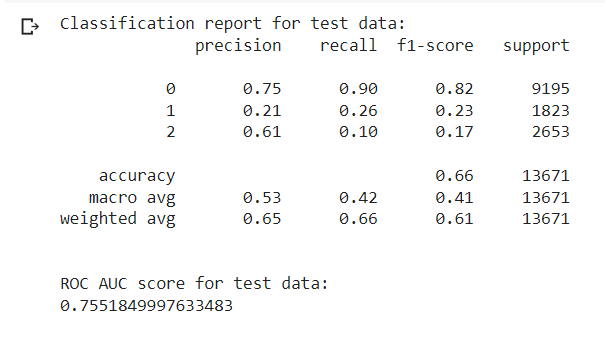

**XgBoost Classifier Hypertuned**



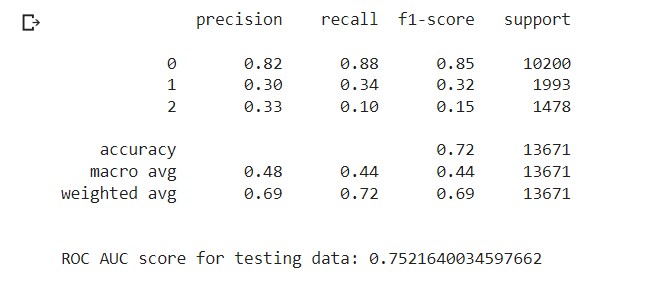

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

 comparing the performance of XGBoost and Random Forest models on various evaluation metrics, it is evident that XGBoost has outperformed Random Forest in terms of accuracy, roc auc score and f1_score. 
 
 
  the recall, precision, and f1_score for XGBoost are comparatively higher than that of Random Forest. Therefore, after careful consideration, XGBoost has been selected as the final prediction model for real user interaction. 
  
  This decision has been made based on the model's superior performance on the aforementioned metrics.

# **Conclusion**

* The customer location feature showed that the percentage ratio of emails that are ignored, read, and acknowledged is comparable regardless of location, suggesting that location does not have a significant impact on email interaction.

* The Email Campaign Type feature demonstrated that Campaign Type 1 had a high possibility of being viewed despite fewer emails being sent, while Campaign Type 2 resulted in most emails being ignored. Campaign 3 was successful as more emails were read and acknowledged despite fewer emails being sent.

* Time of day when an email was sent was not found to be a significant factor in email classification according to both feature importance and analysis. However, emails sent in category 2 during the middle of the day were more likely to be read and acknowledged.

* The analysis revealed that having more emails leads to more emails being read and acknowledged, highlighting the importance of building a relationship with customers.

* Emails with too many words tend to be ignored. Additionally, emails that were ignored contained more pictures.

* With the exception of Word Count, all continuous variables had outliers, but removing them could cause information loss. Therefore, outliers were left in the analysis.

* The XGBoost algorithm performed the best with such unbalanced data and outliers, followed by the Random Forest Hyperparameter Tuned model.